<a href="https://colab.research.google.com/github/yugetcodes/git-demo/blob/main/classification_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [8]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records.csv to heart_failure_clinical_records.csv


In [9]:
df = pd.read_csv("/content/heart_failure_clinical_records.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [11]:
df.shape

(5000, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [13]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [14]:
df.nunique()

age                          48
anaemia                       2
creatinine_phosphokinase    290
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   203
serum_creatinine             43
serum_sodium                 27
sex                           2
smoking                       2
time                        155
DEATH_EVENT                   2
dtype: int64

In [15]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [16]:
df.duplicated().sum()

3680

In [17]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index([], dtype='object')

Numerical type columns:
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


In [18]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [19]:
categorical, non_categorical, discrete, continuous = classify_features(df)
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: []
Discrete Features: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
Continuous Features: ['creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']


# Data Visualization

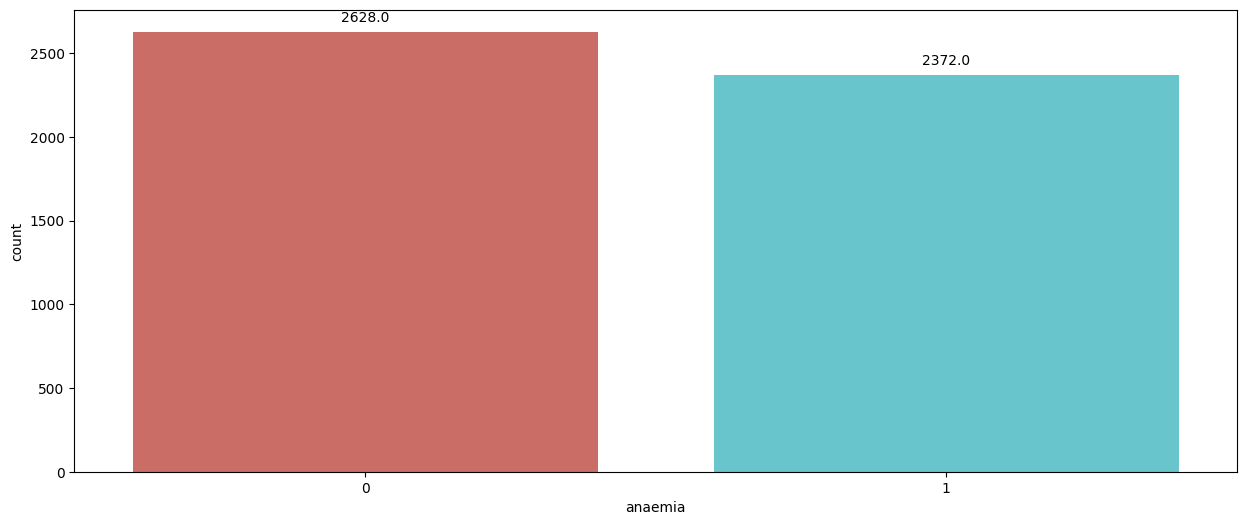

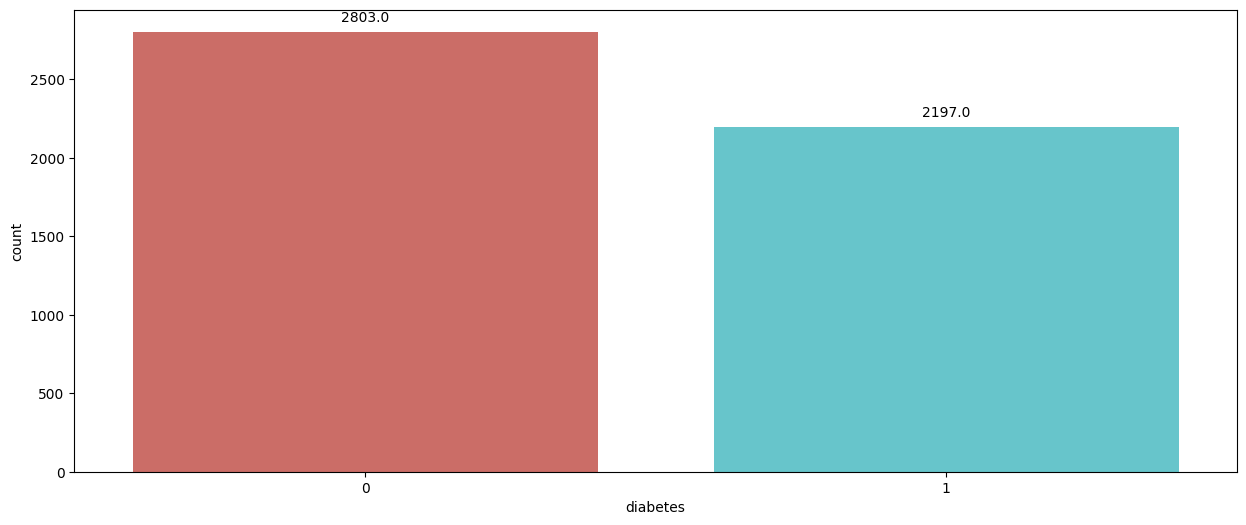

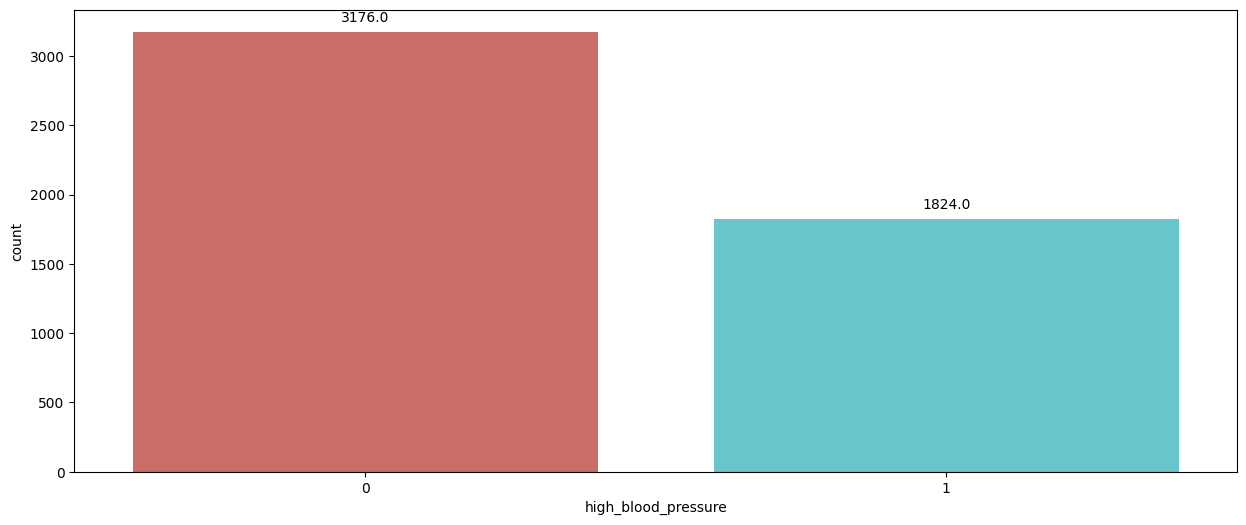

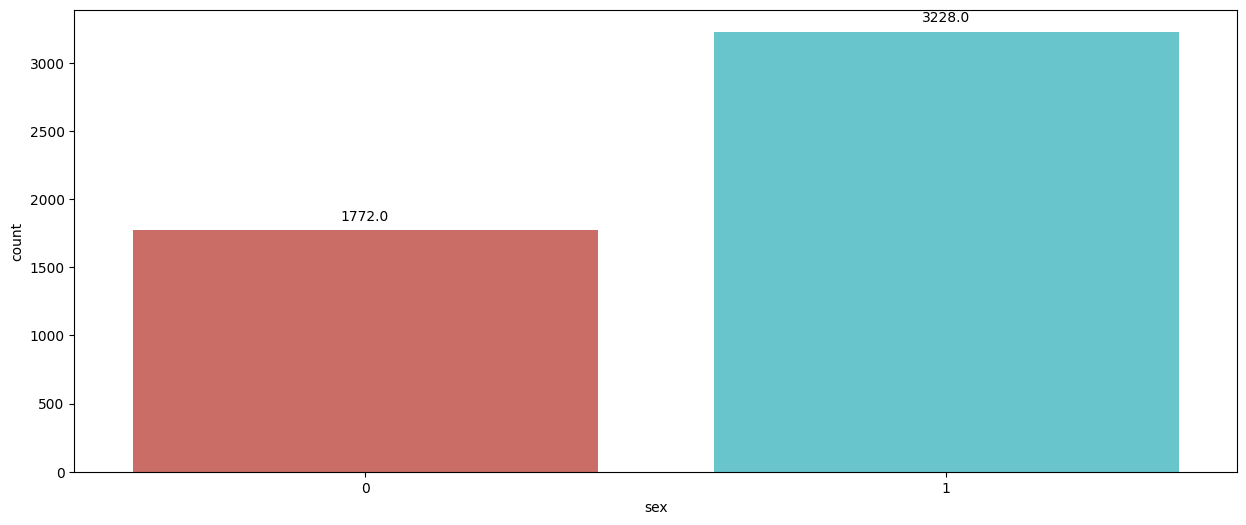

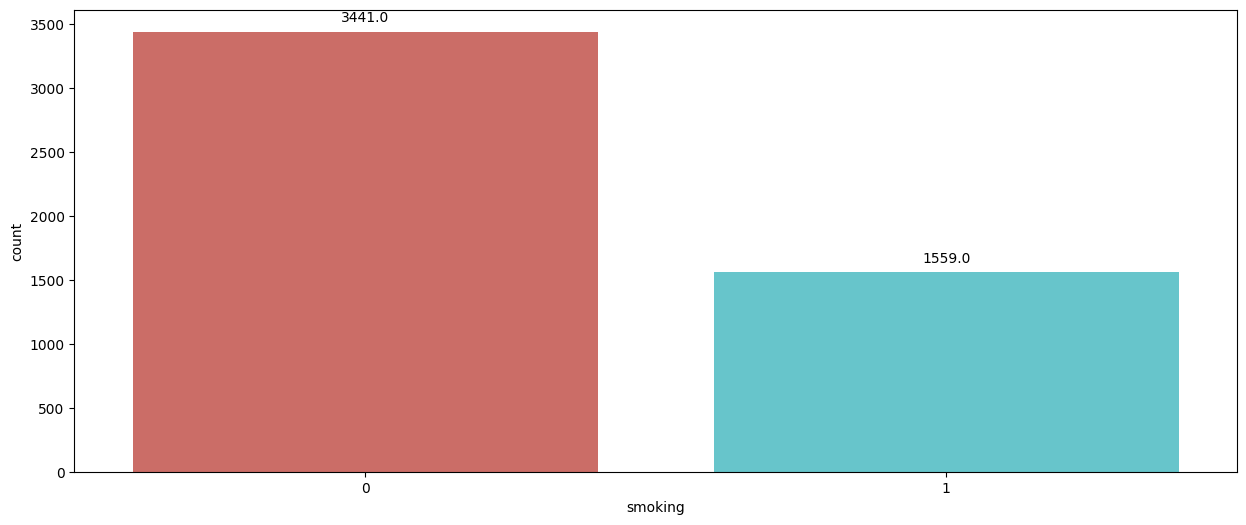

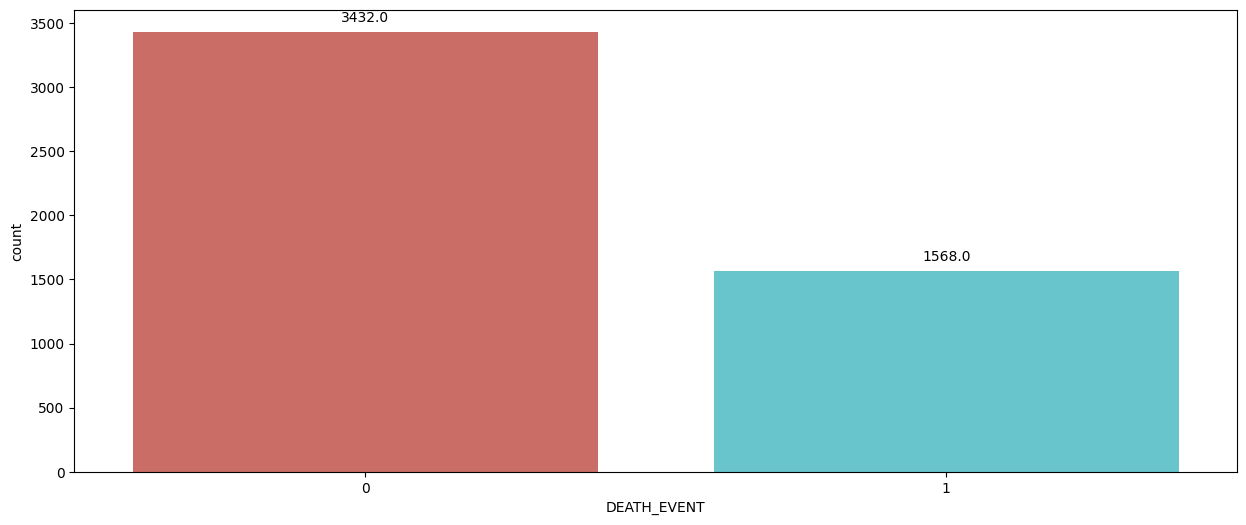

In [20]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [21]:
correlation_matrix = df.corr()
correlation_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
creatinine_phosphokinase,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
ejection_fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
high_blood_pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
serum_creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
serum_sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


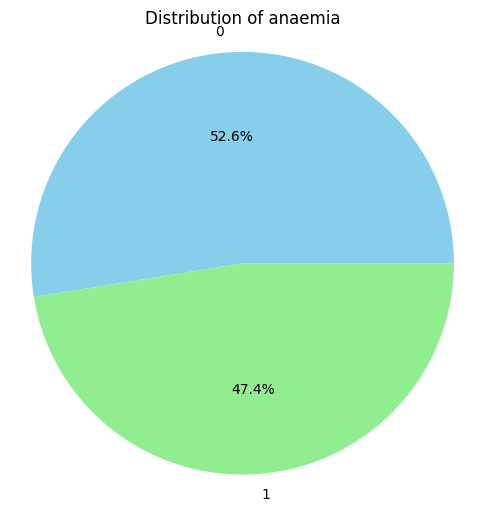

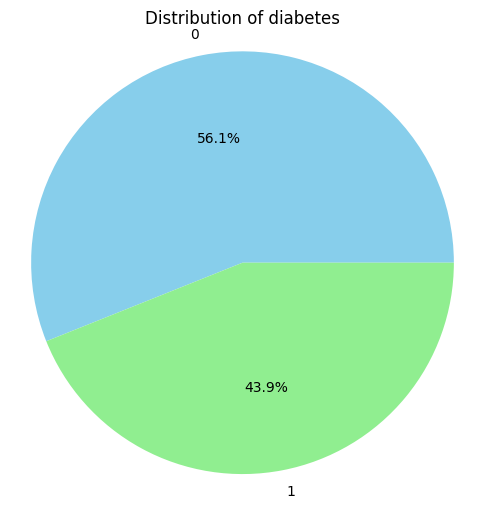

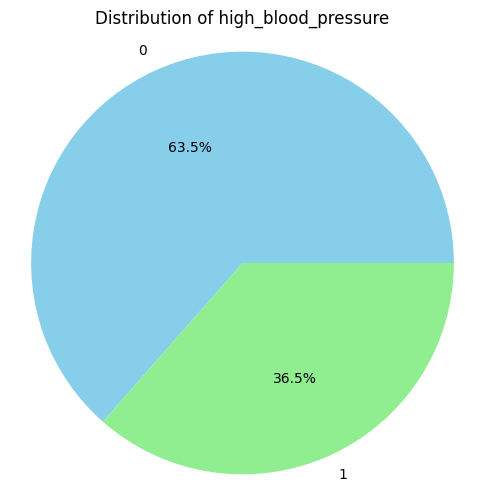

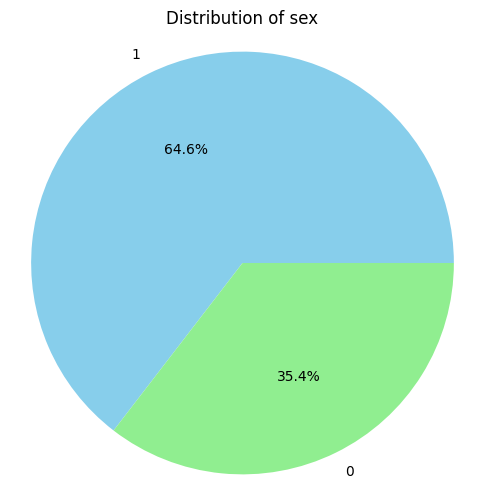

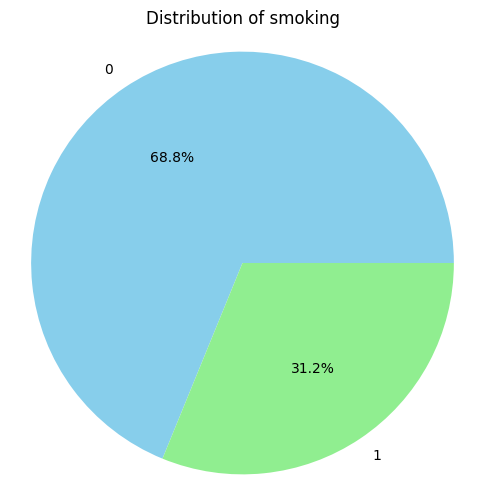

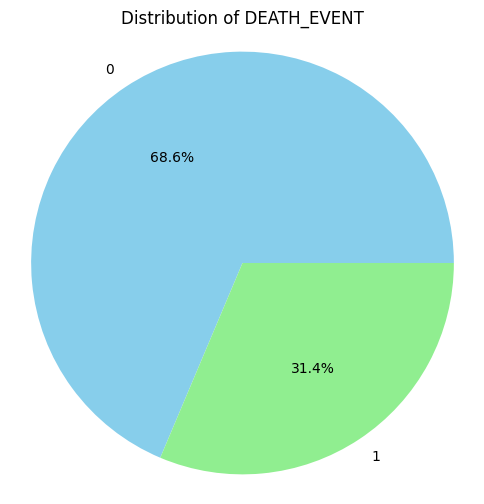

In [22]:
for i in discrete:
    plt.figure(figsize=(6,6))
    counts = df[i].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    plt.title(f'Distribution of {i}')
    plt.axis('equal')
    plt.show()

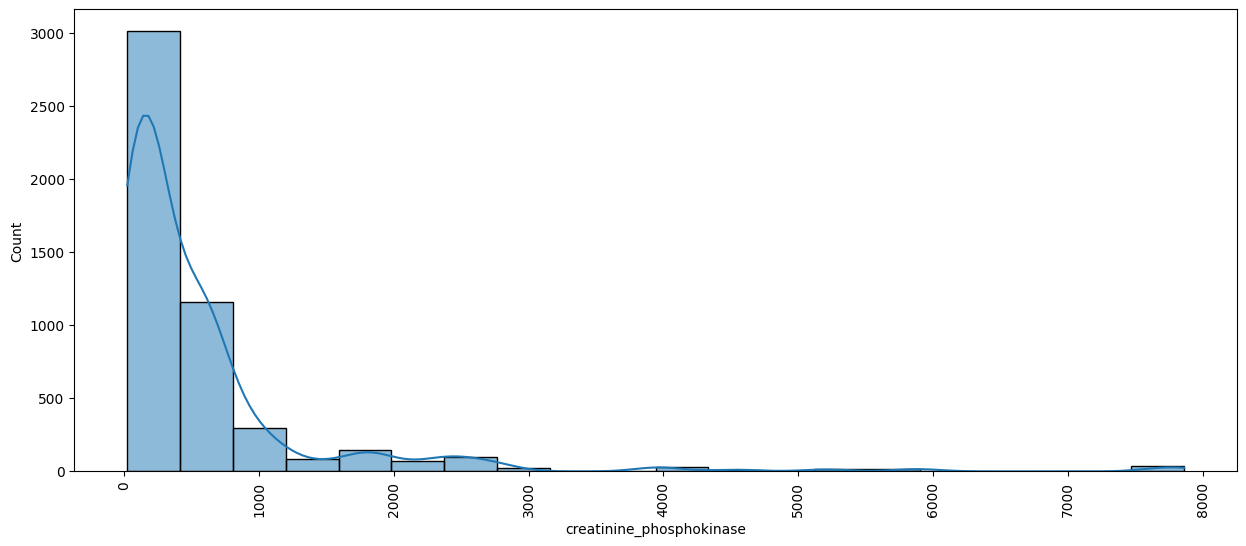

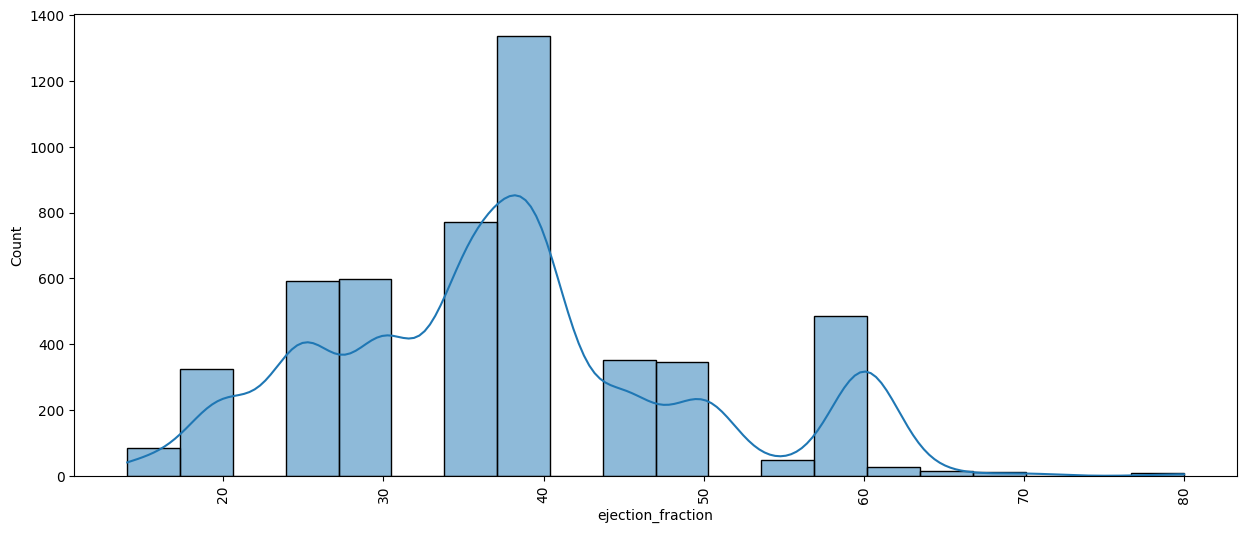

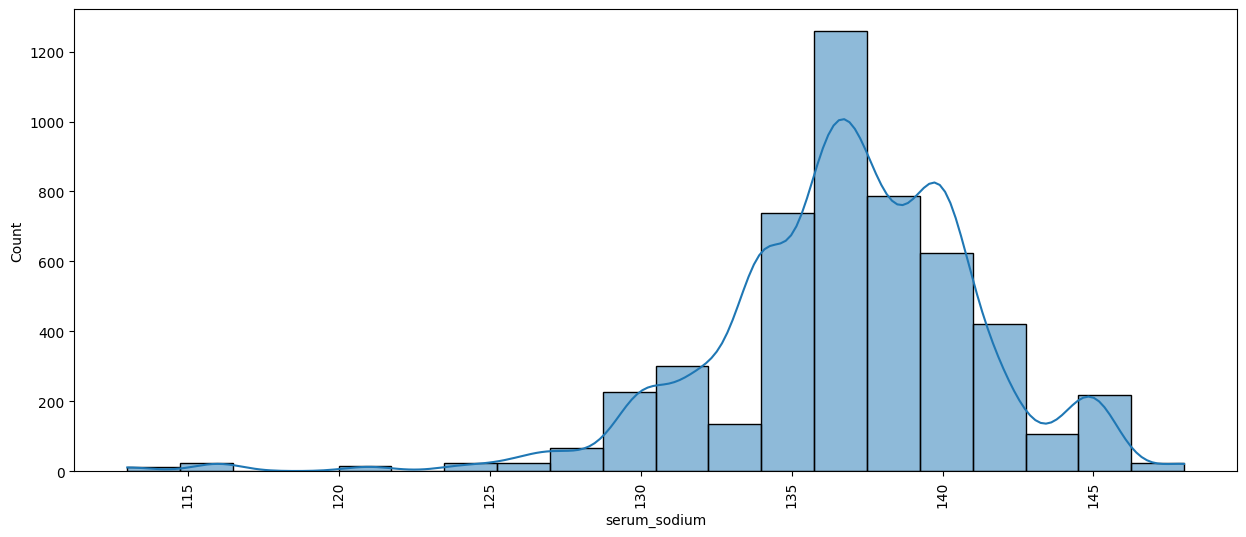

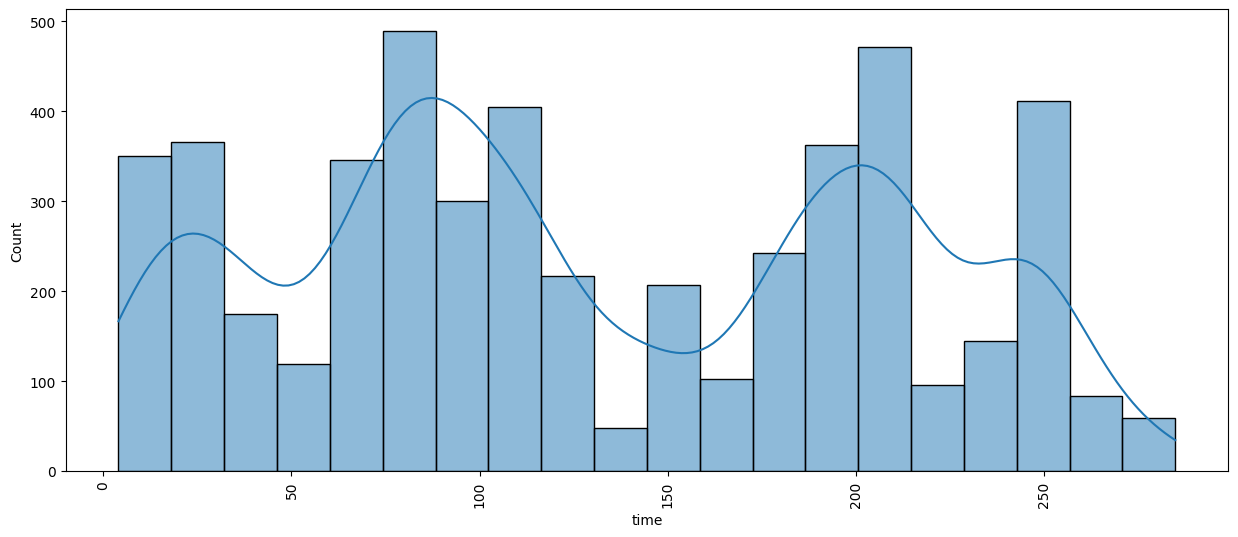

In [23]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

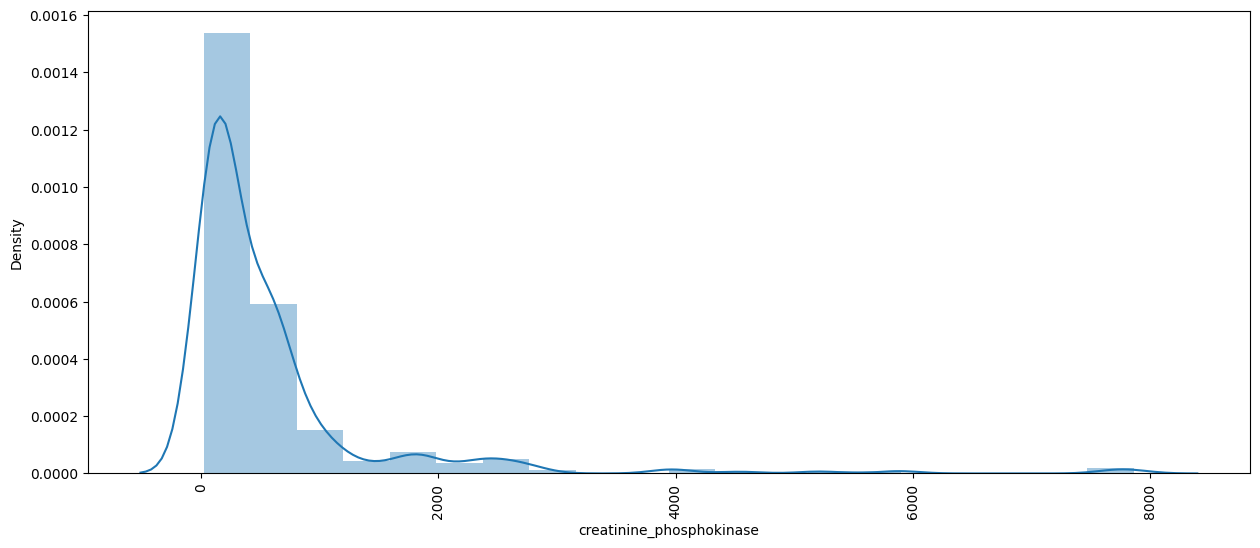

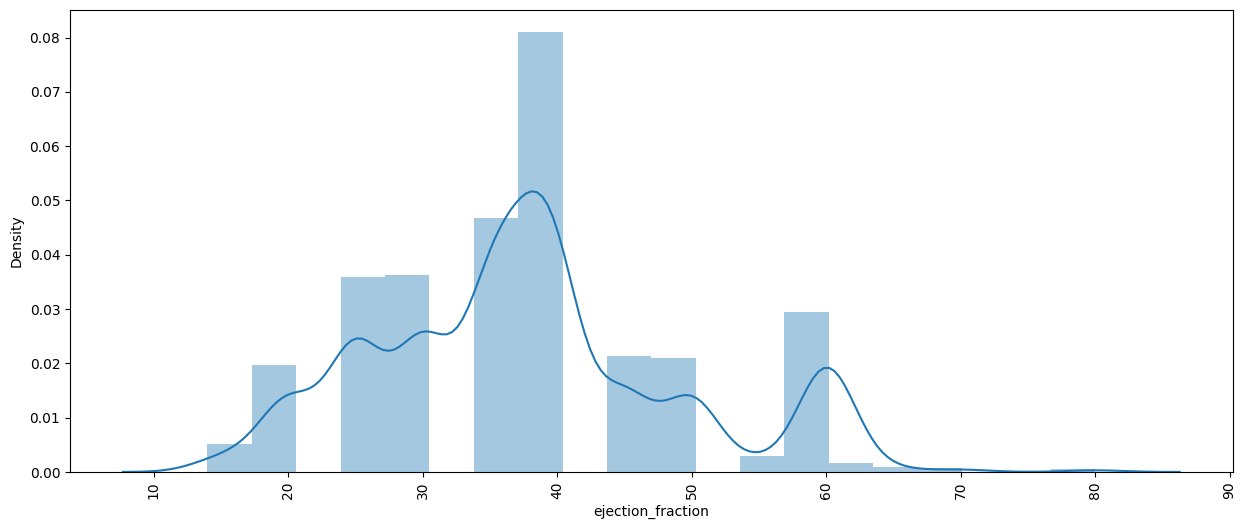

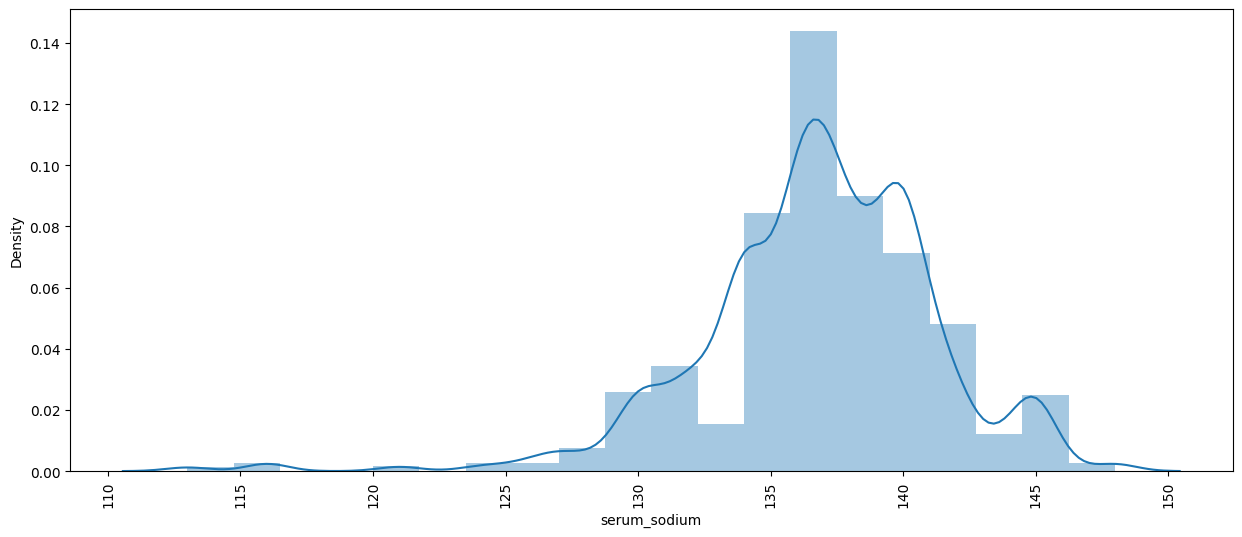

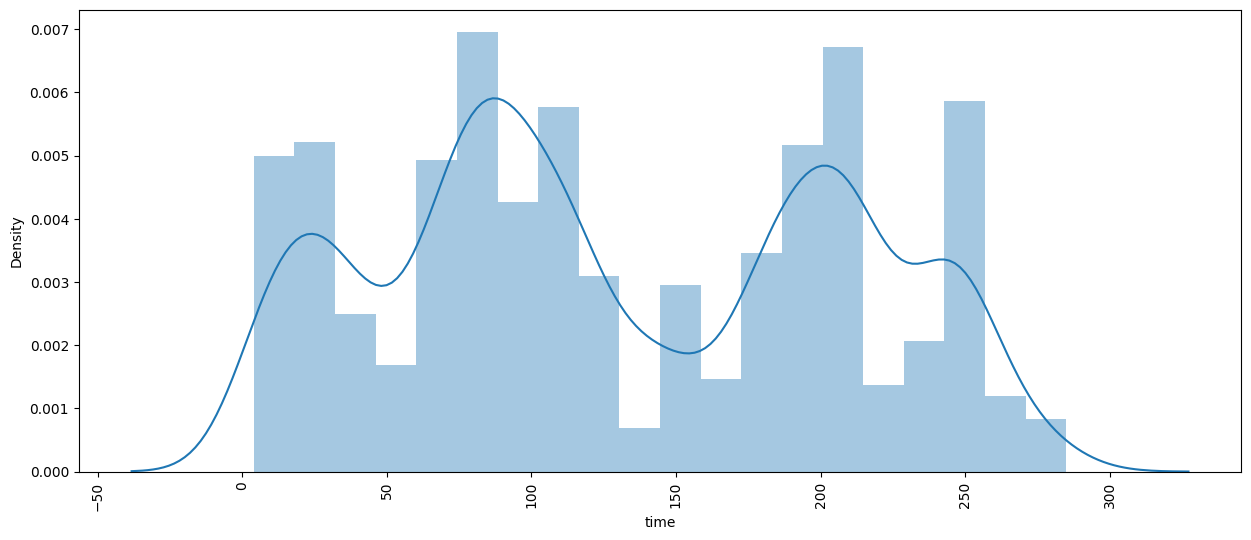

In [24]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

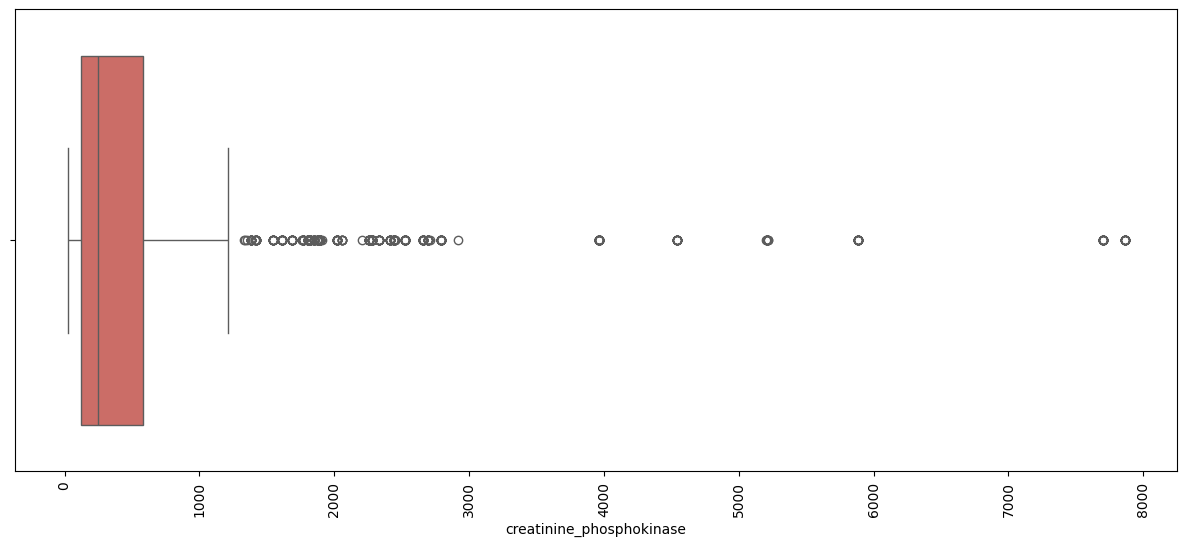

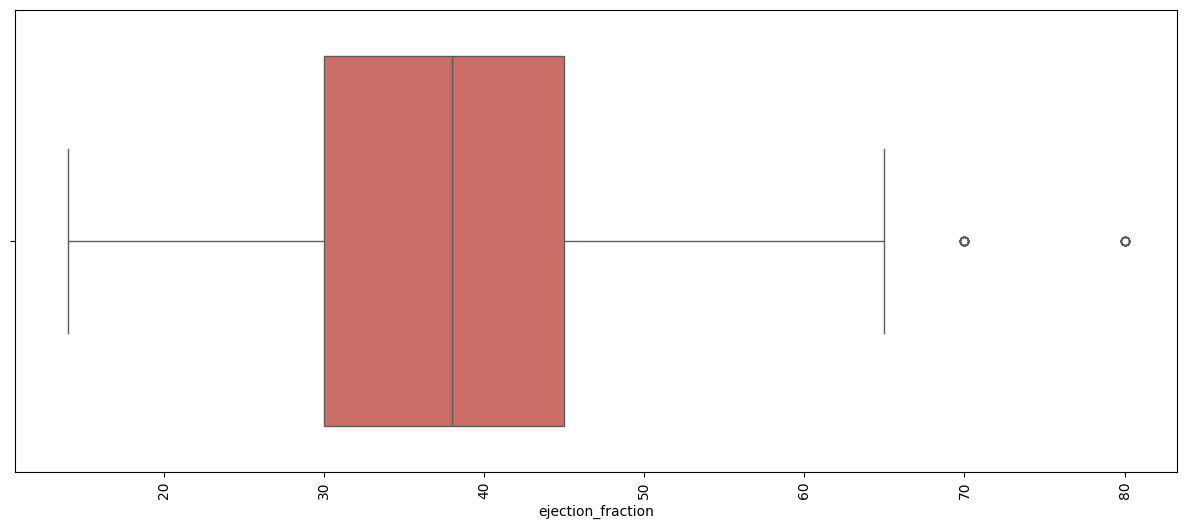

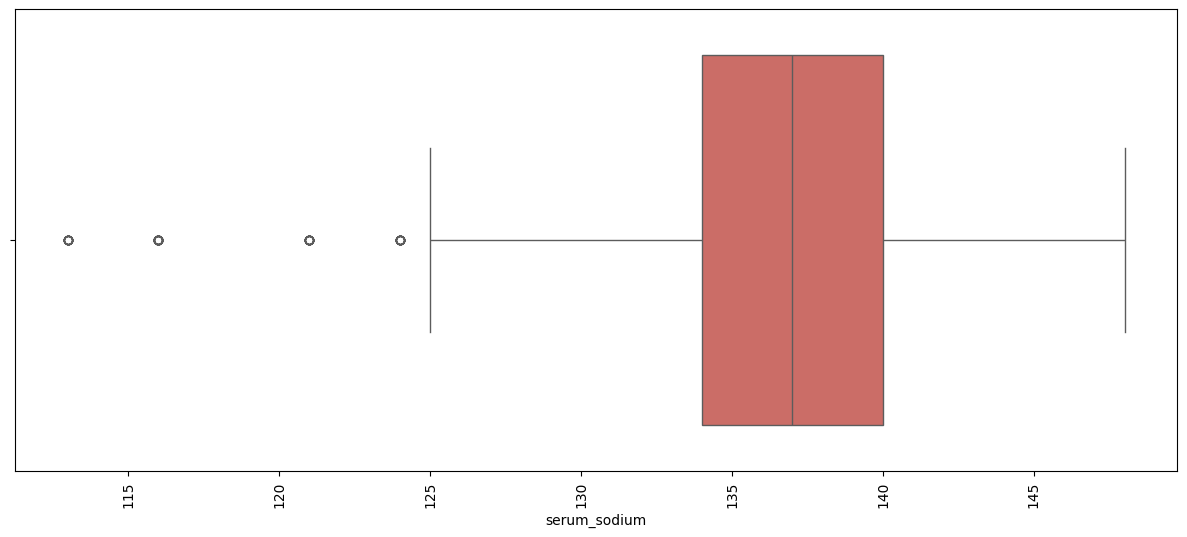

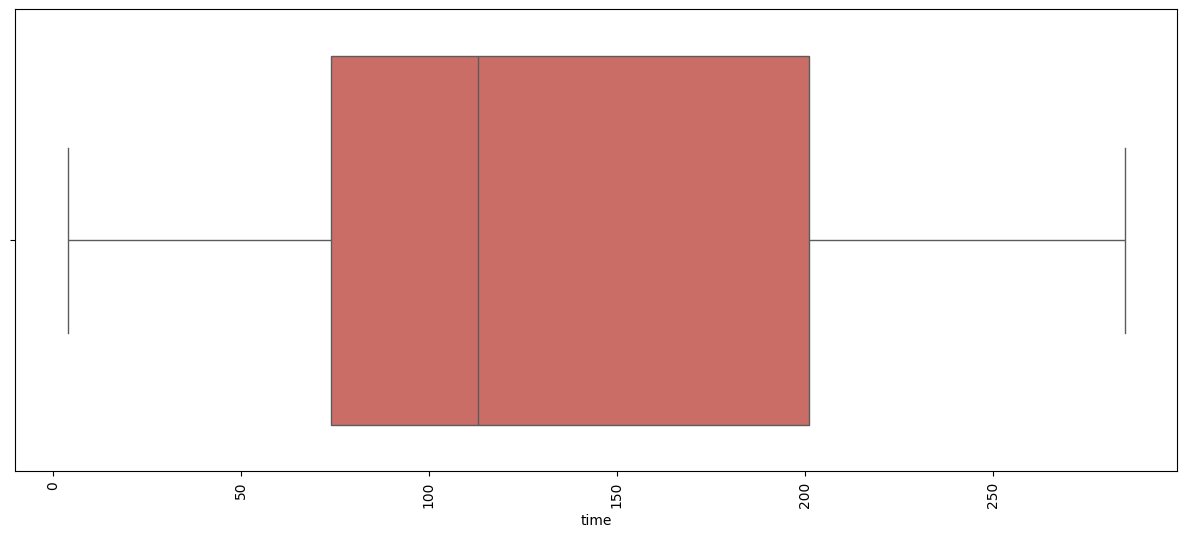

In [25]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

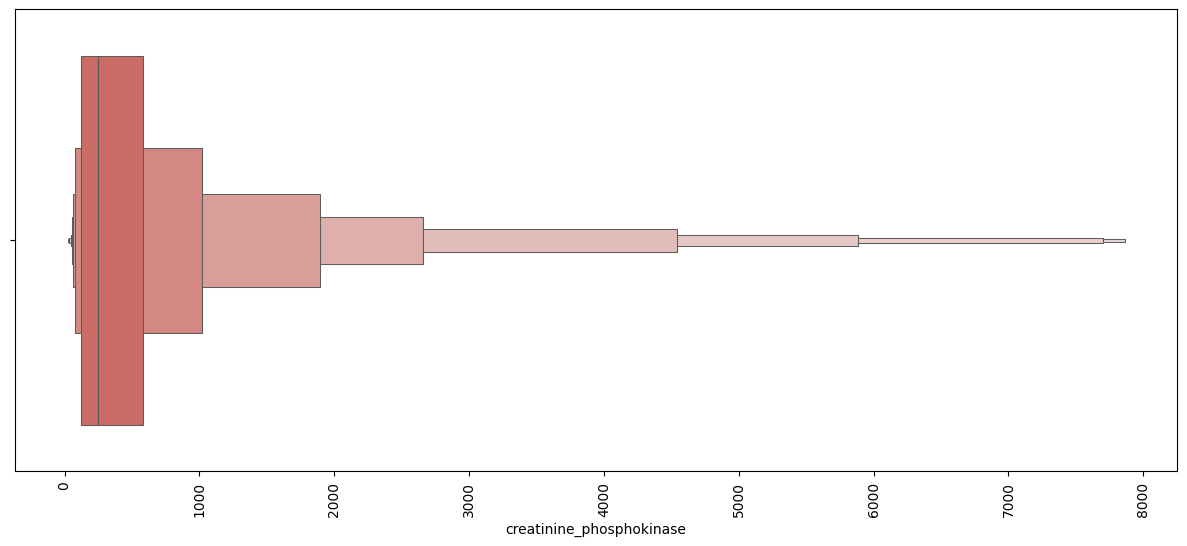

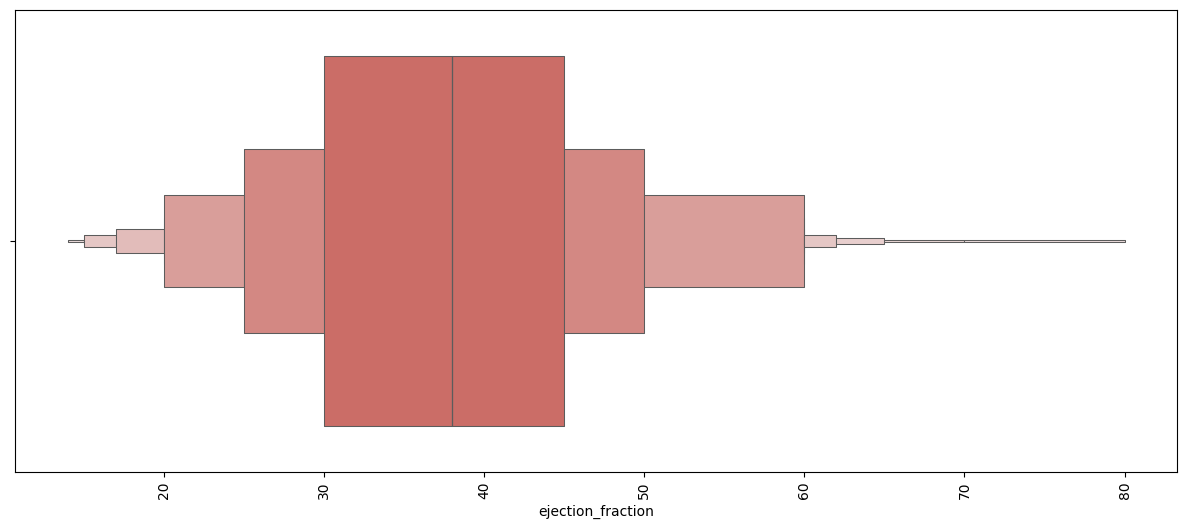

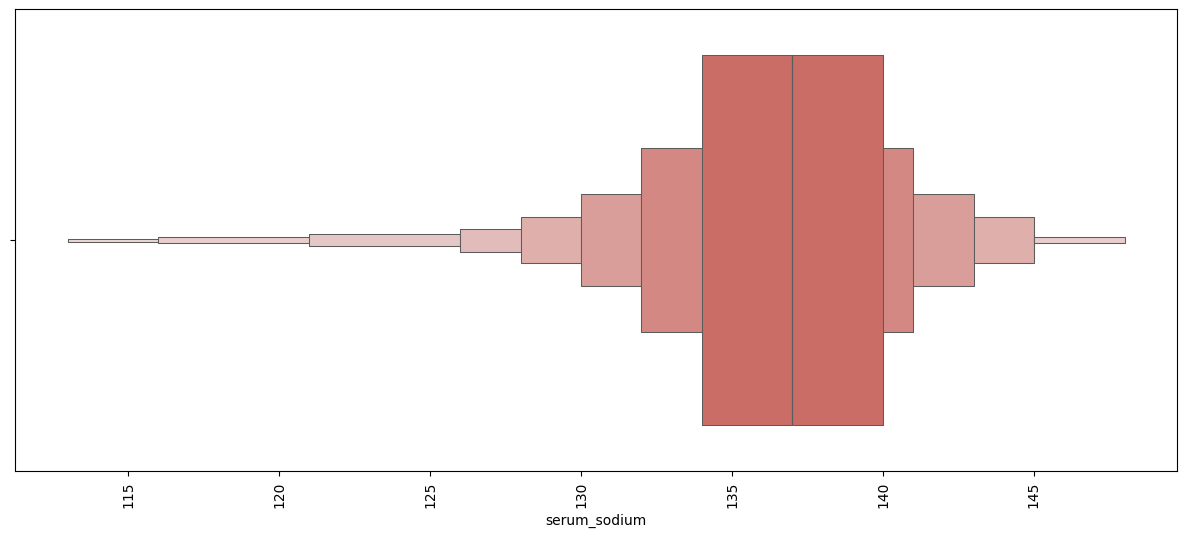

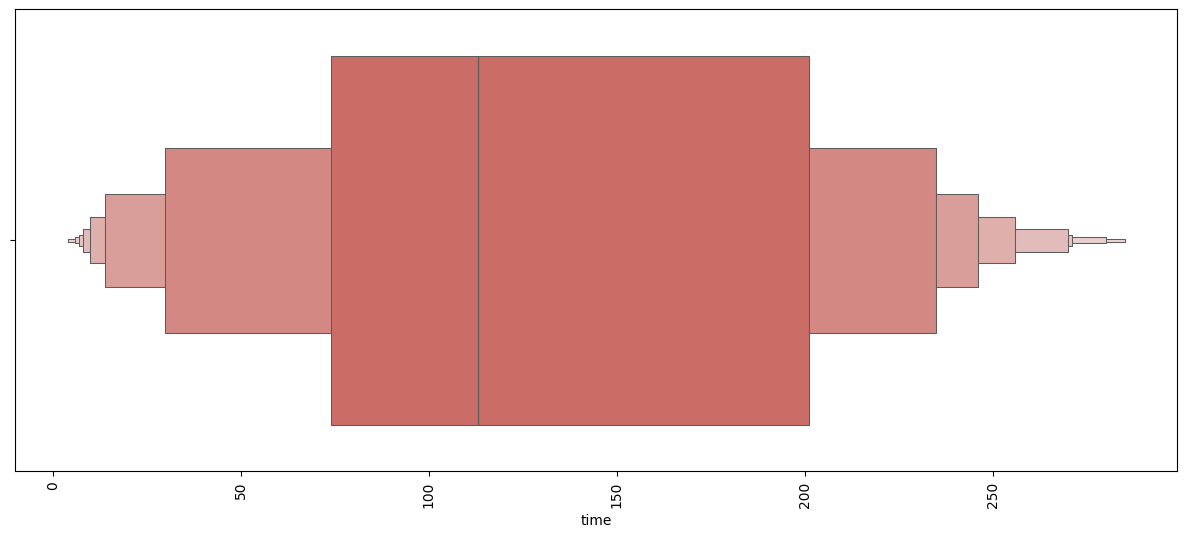

In [26]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

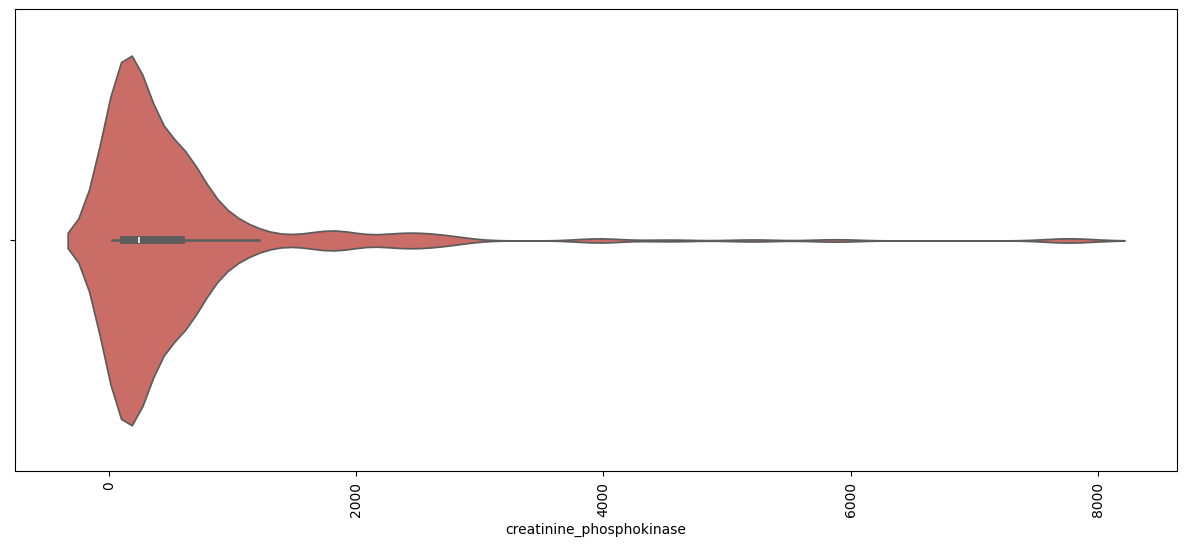

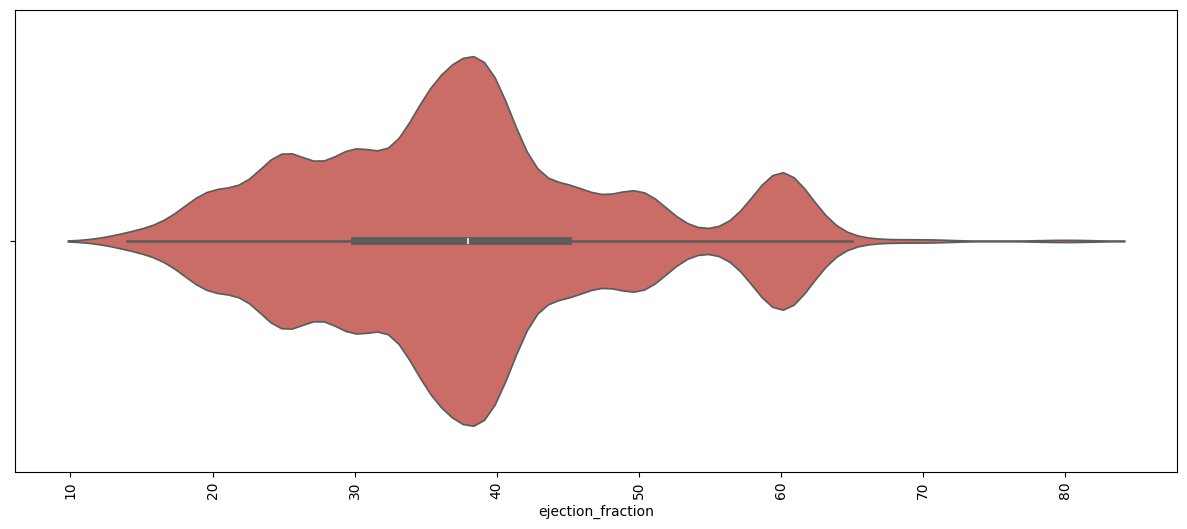

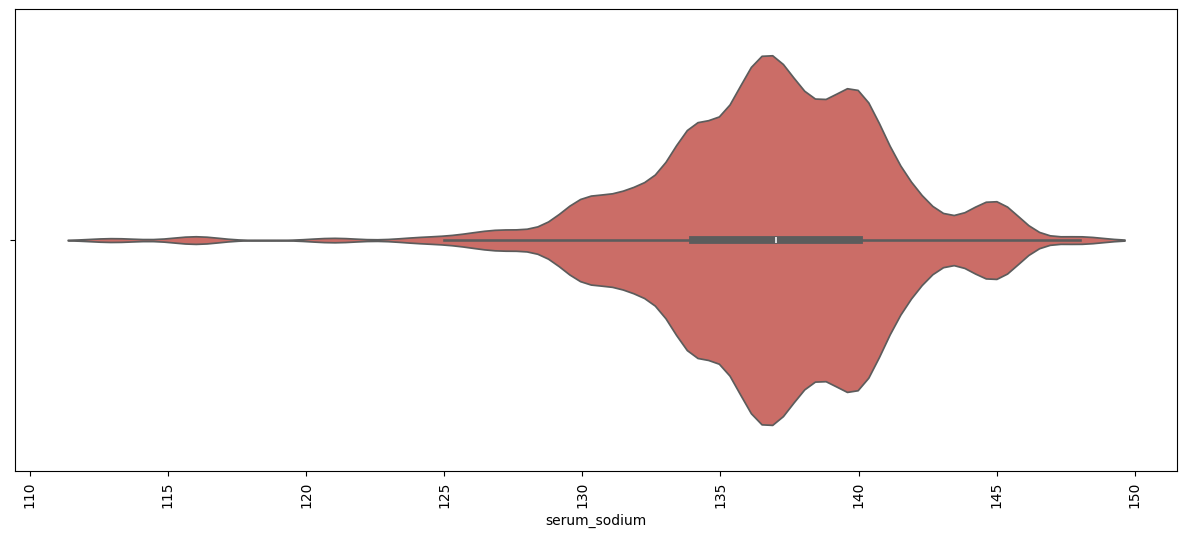

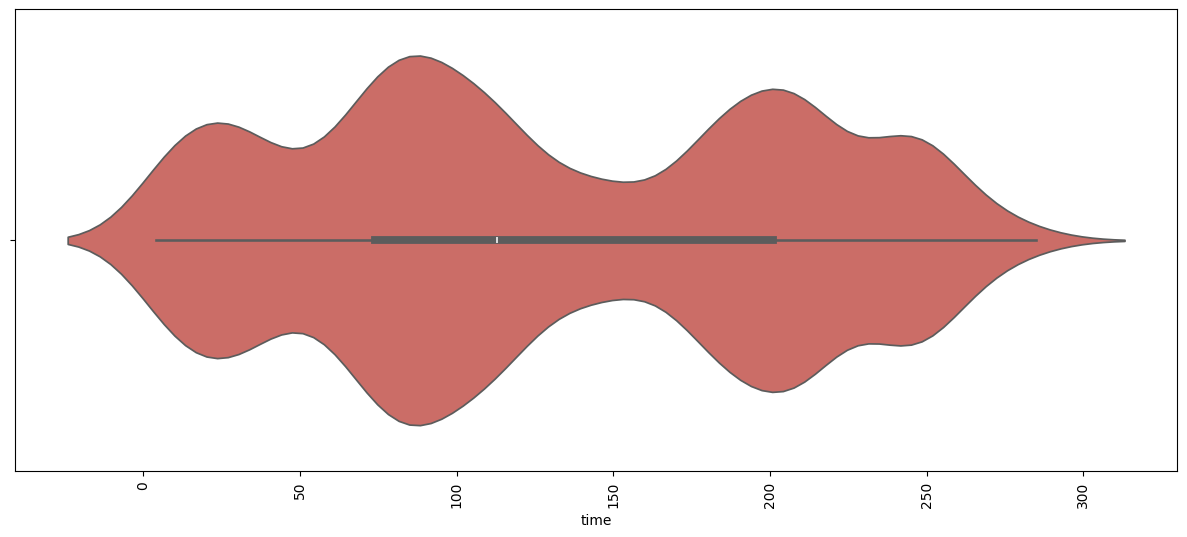

In [27]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

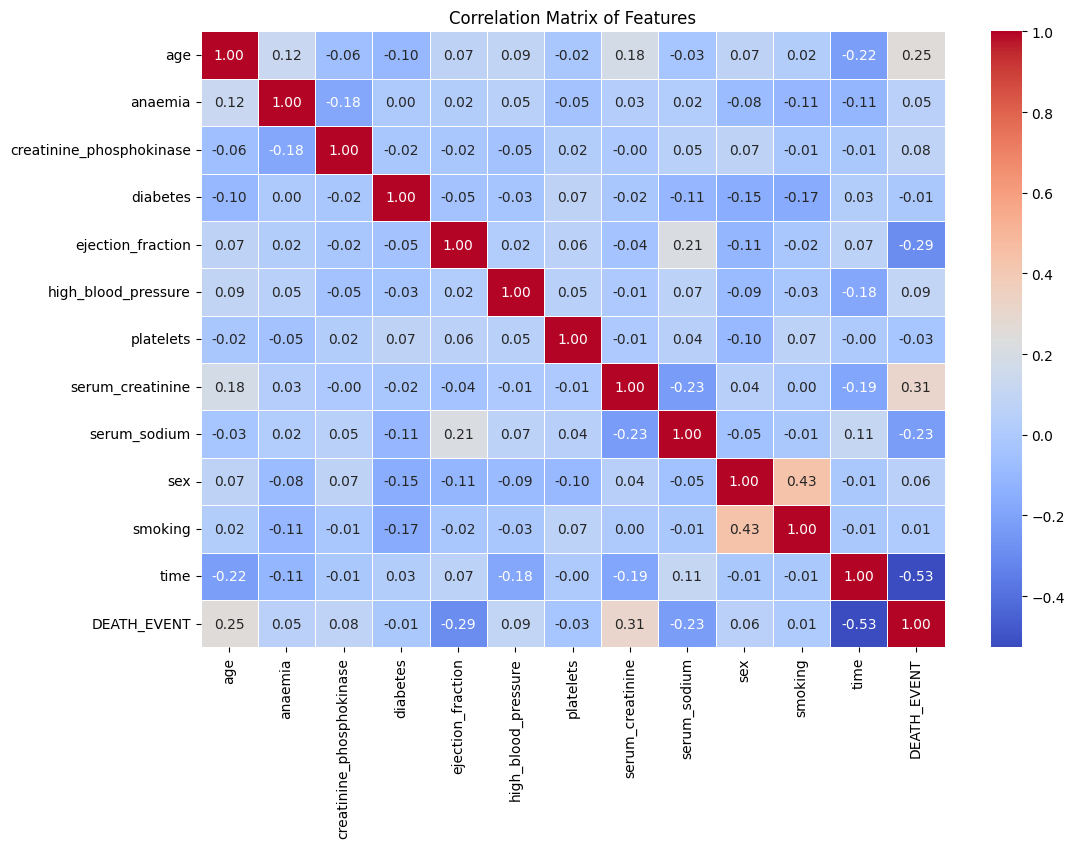

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [29]:

categorical_features = []
non_categorical_features = []
discrete_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
continuous_features = ['creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']
target = 'DEATH_EVENT'

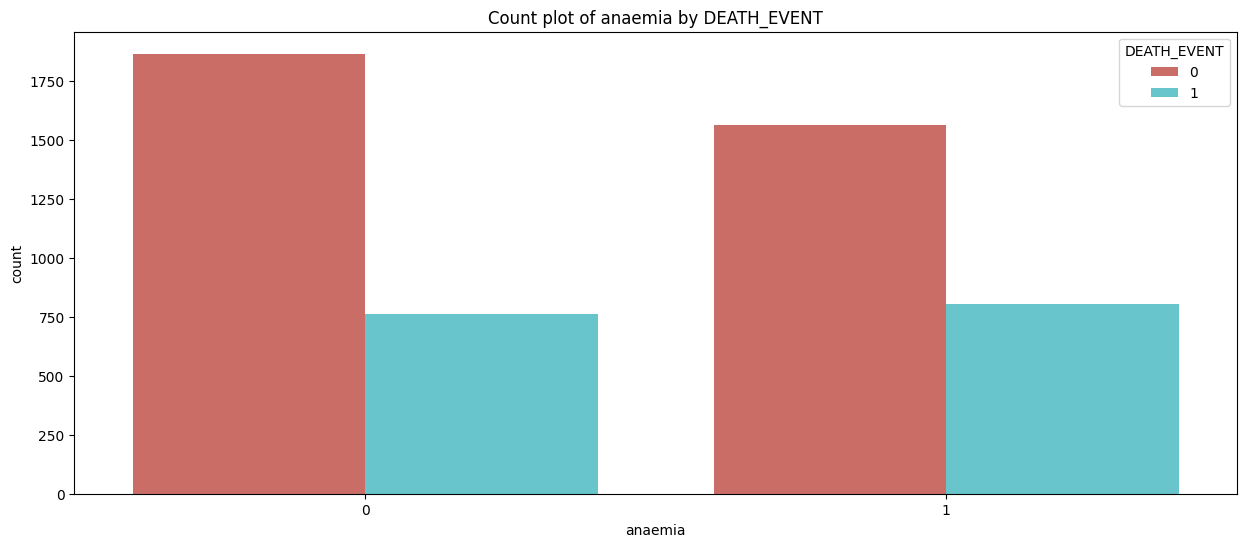

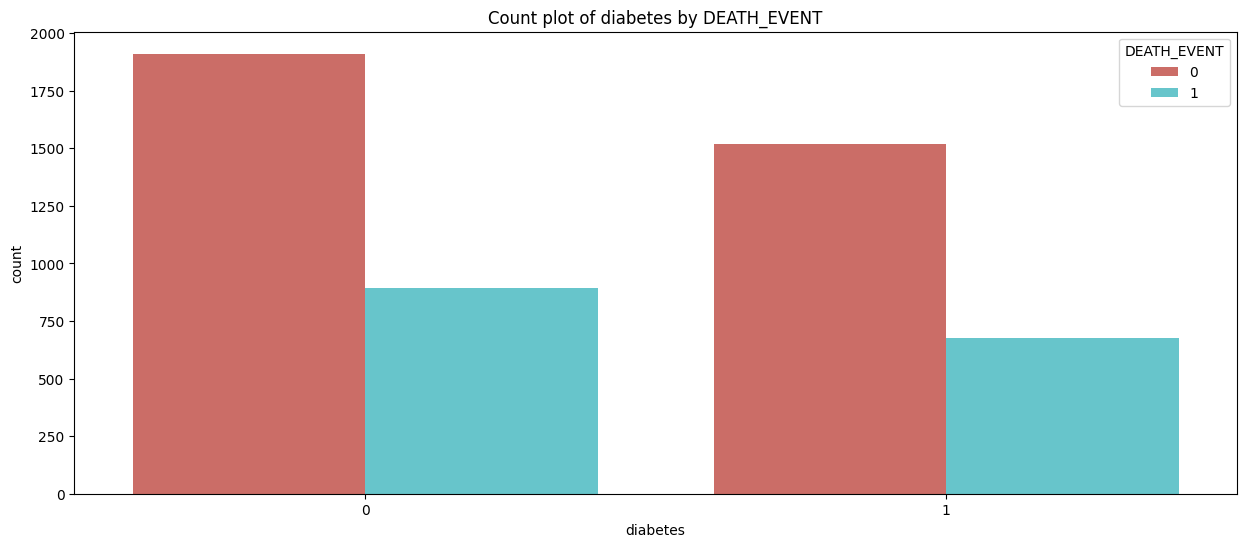

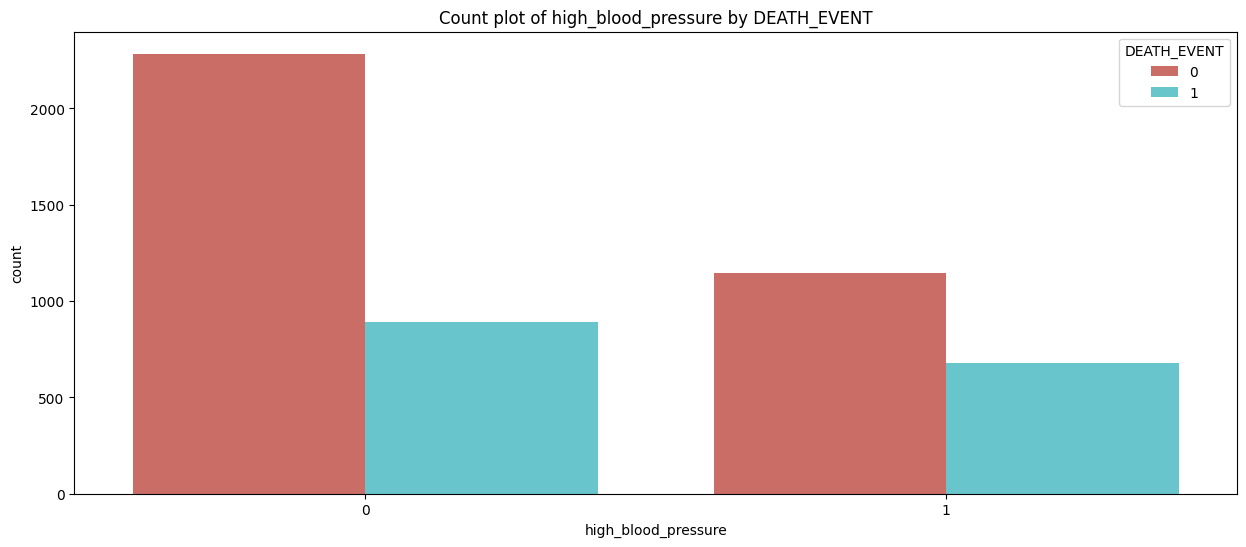

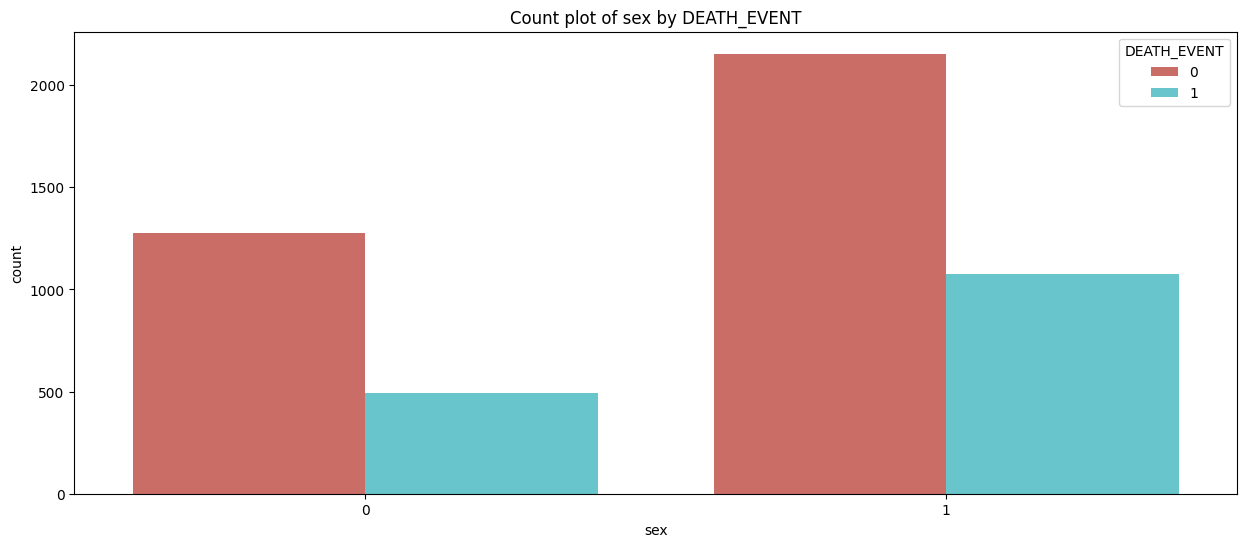

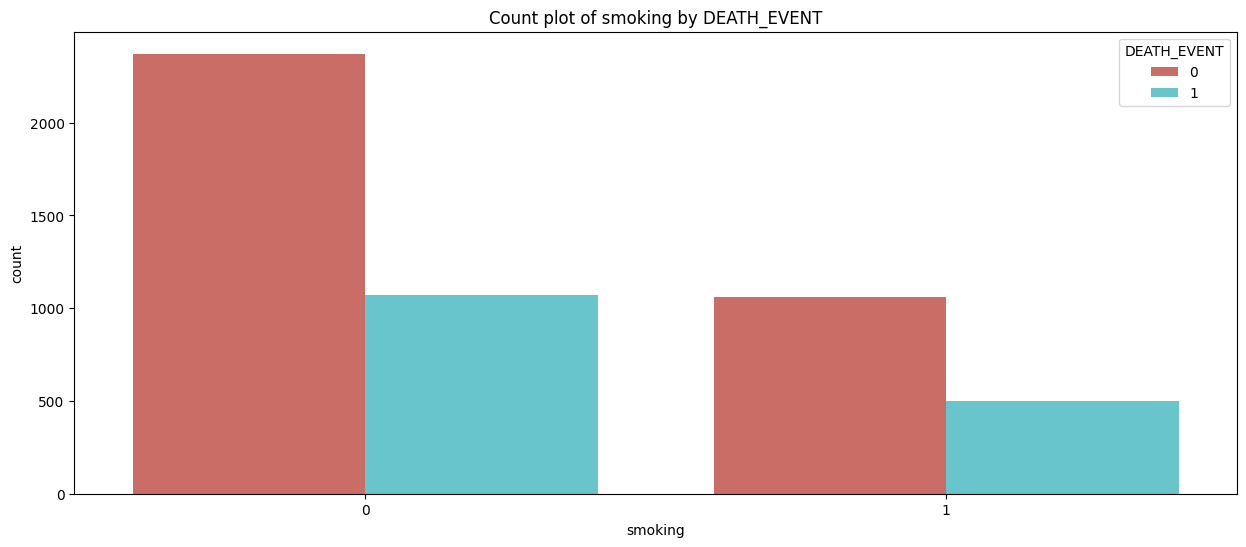

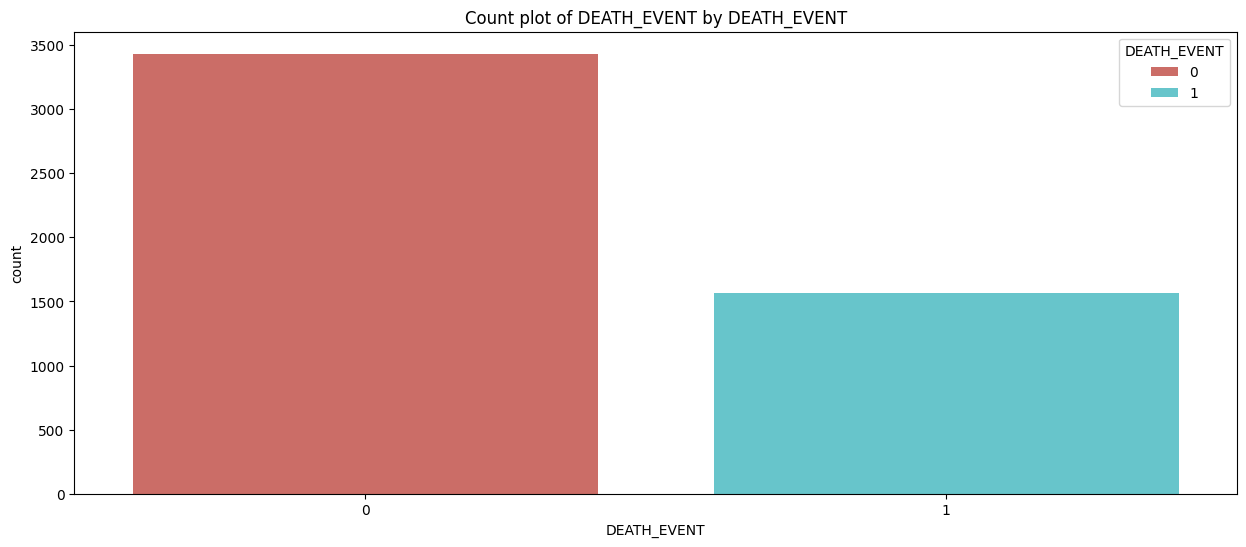

In [30]:
for feature in discrete_features:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=feature, hue=target, data=df, palette='hls')
    plt.title(f'Count plot of {feature} by {target}')
    plt.show()

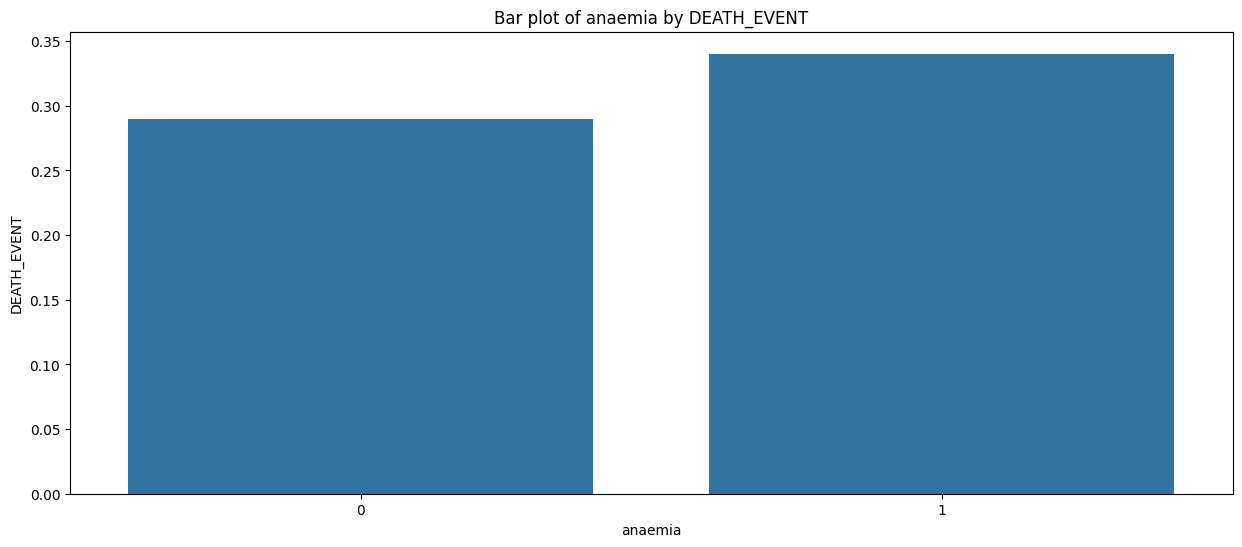

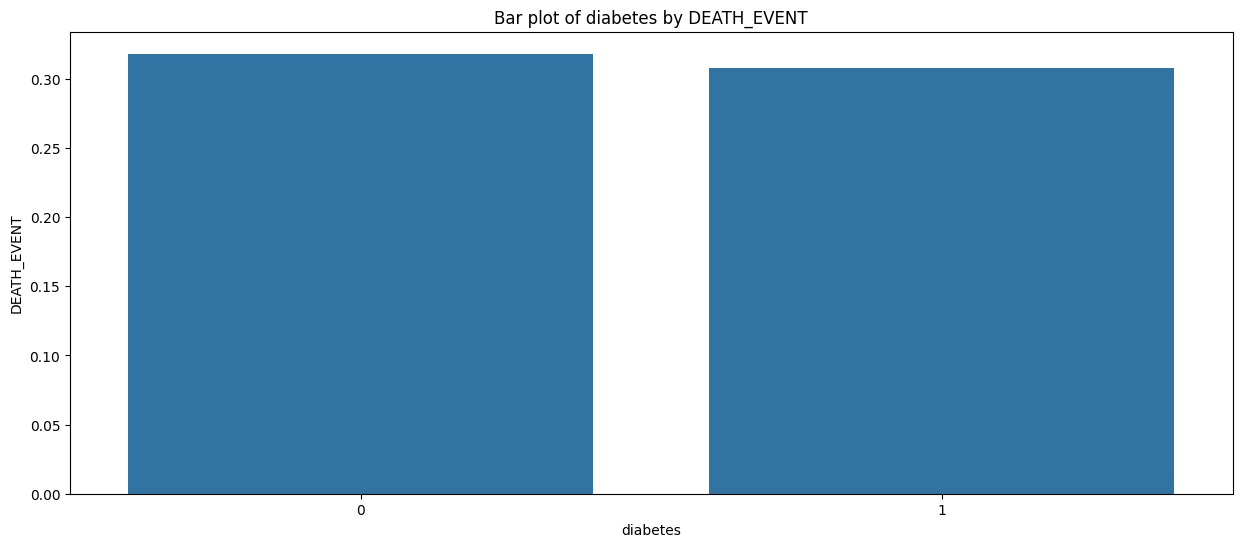

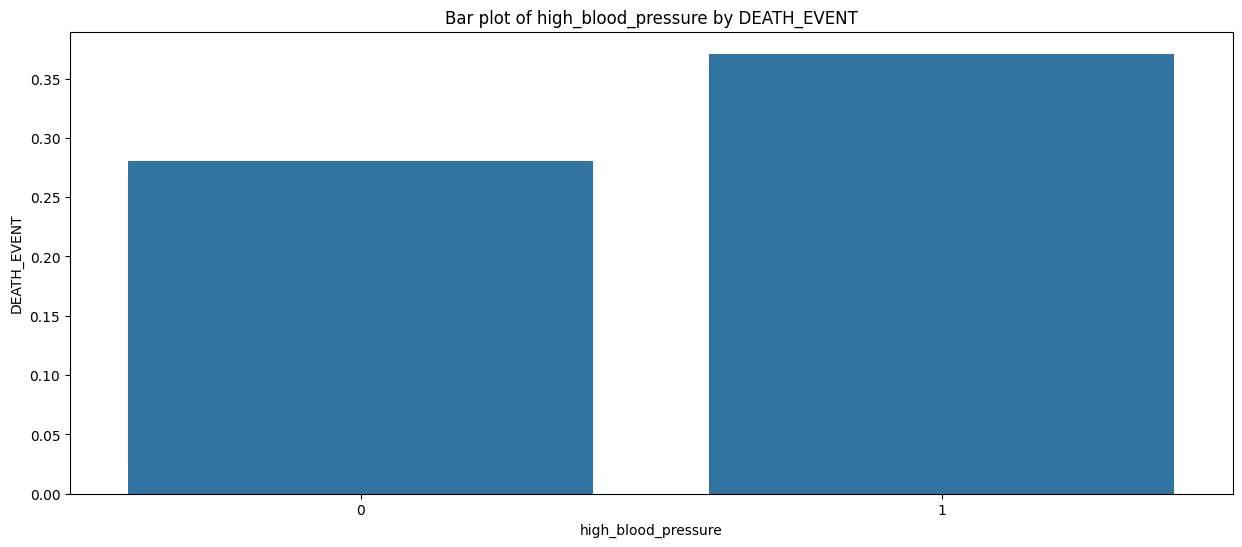

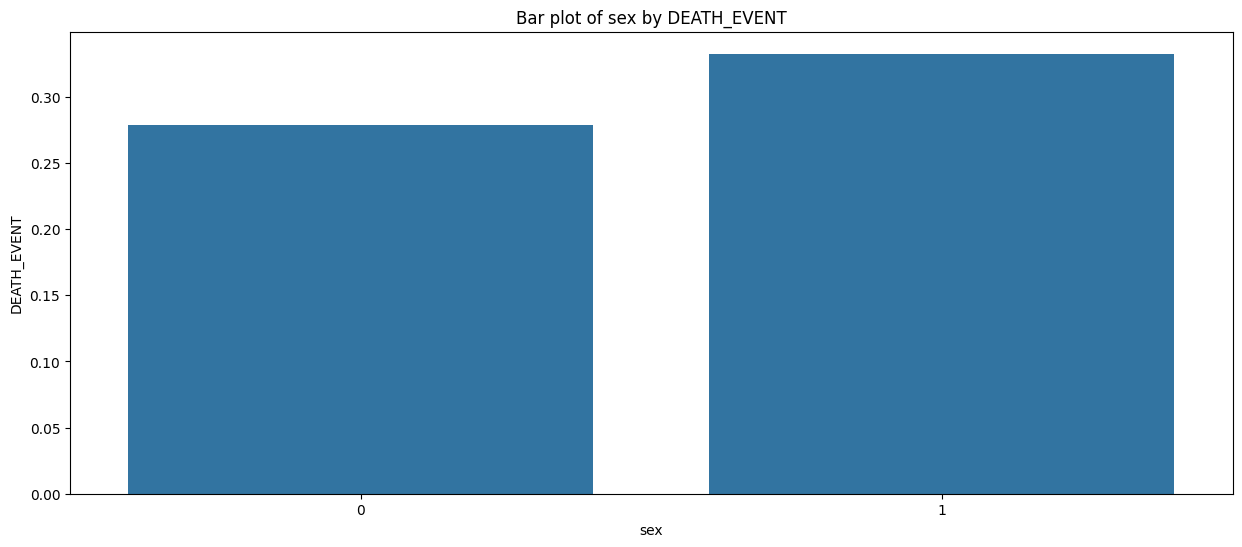

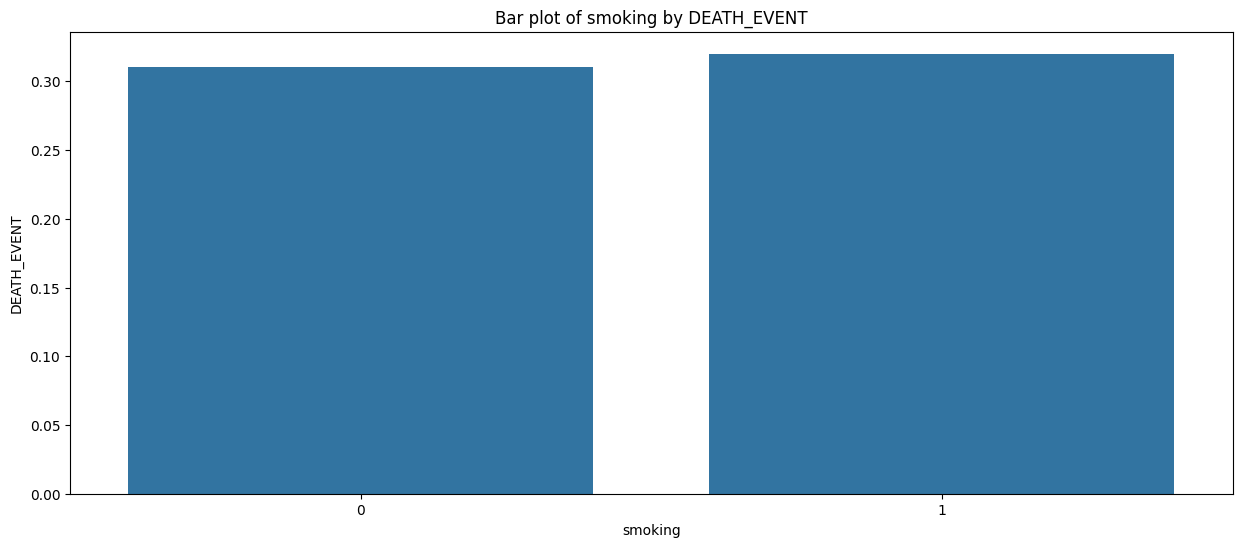

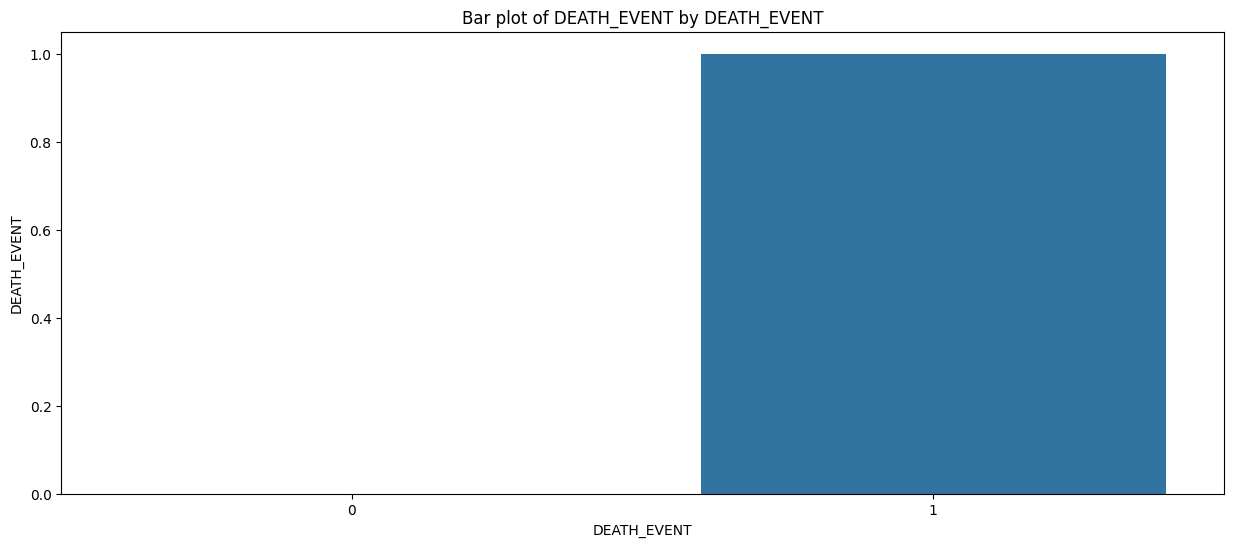

In [31]:
for feature in discrete_features:
    plt.figure(figsize=(15, 6))
    sns.barplot(y=target, x=feature, ci = None, data=df)
    plt.title(f'Bar plot of {feature} by {target}')
    plt.show()

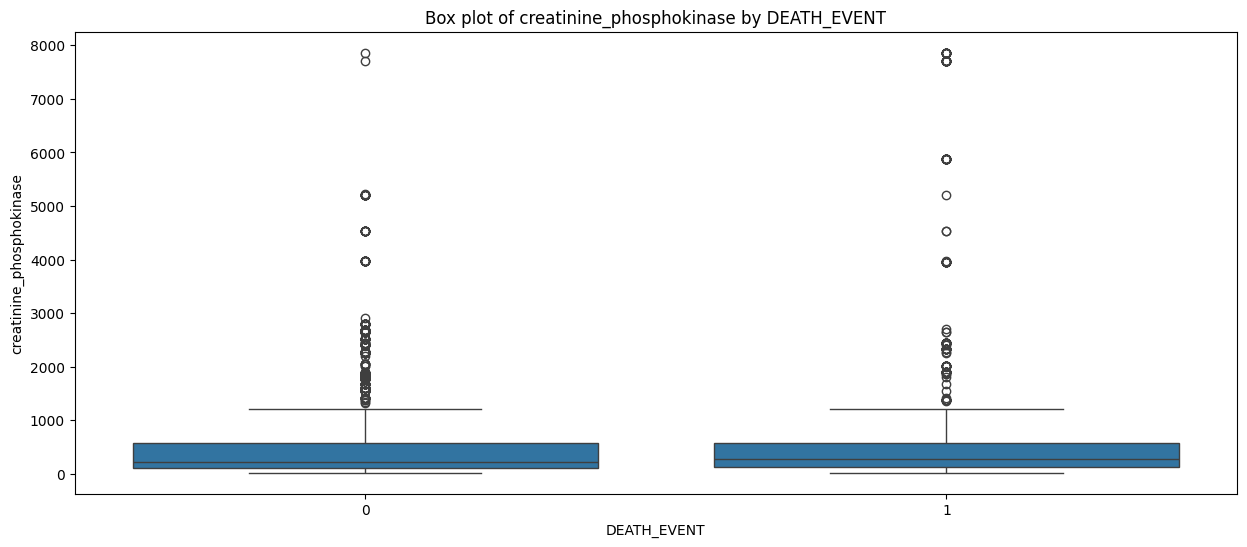

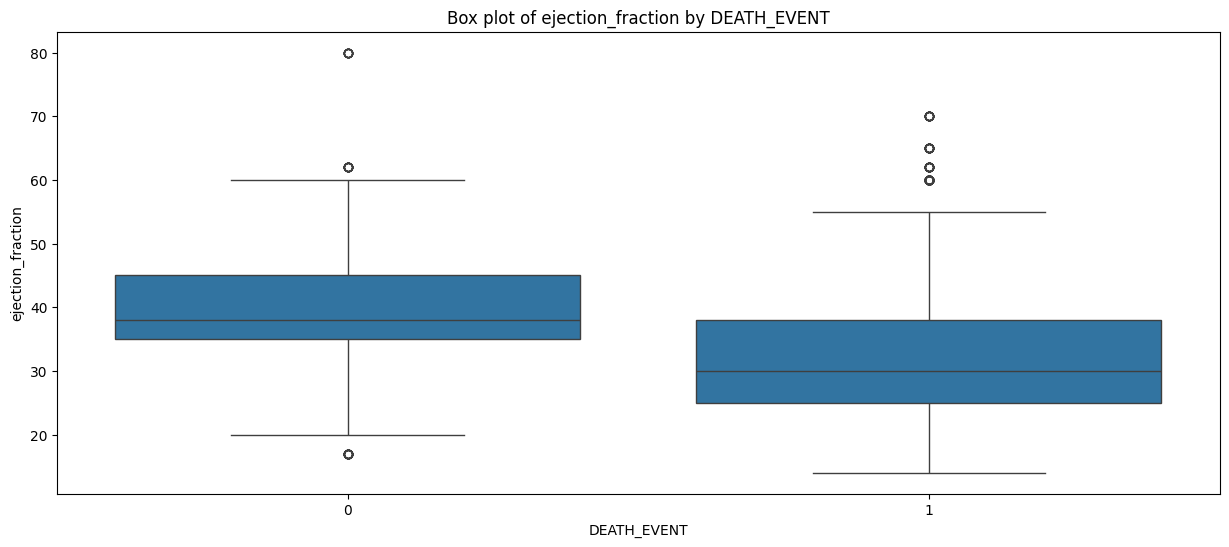

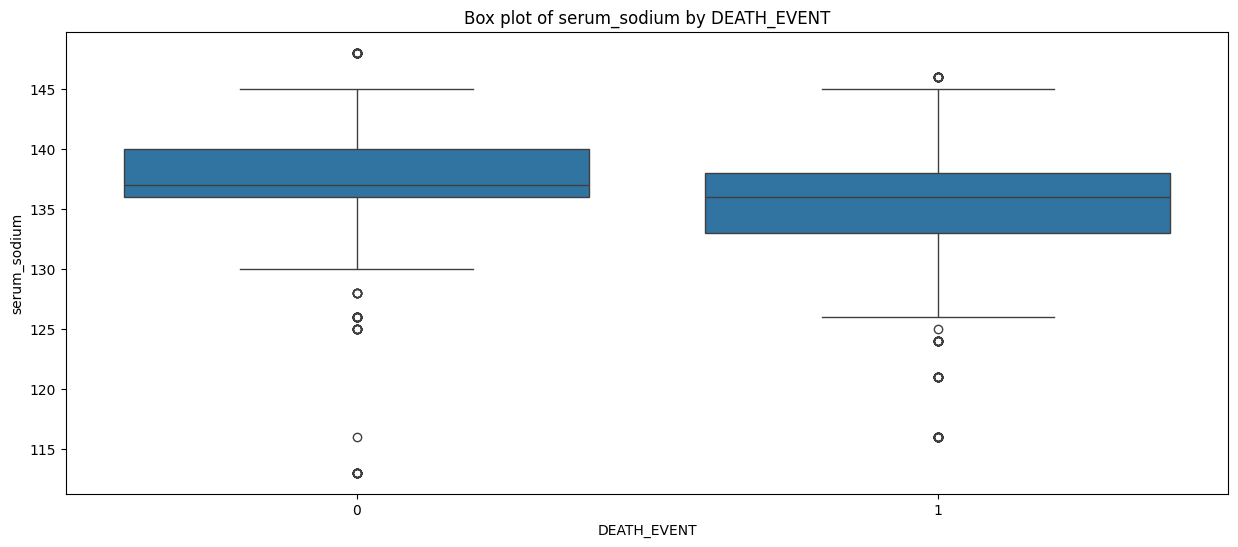

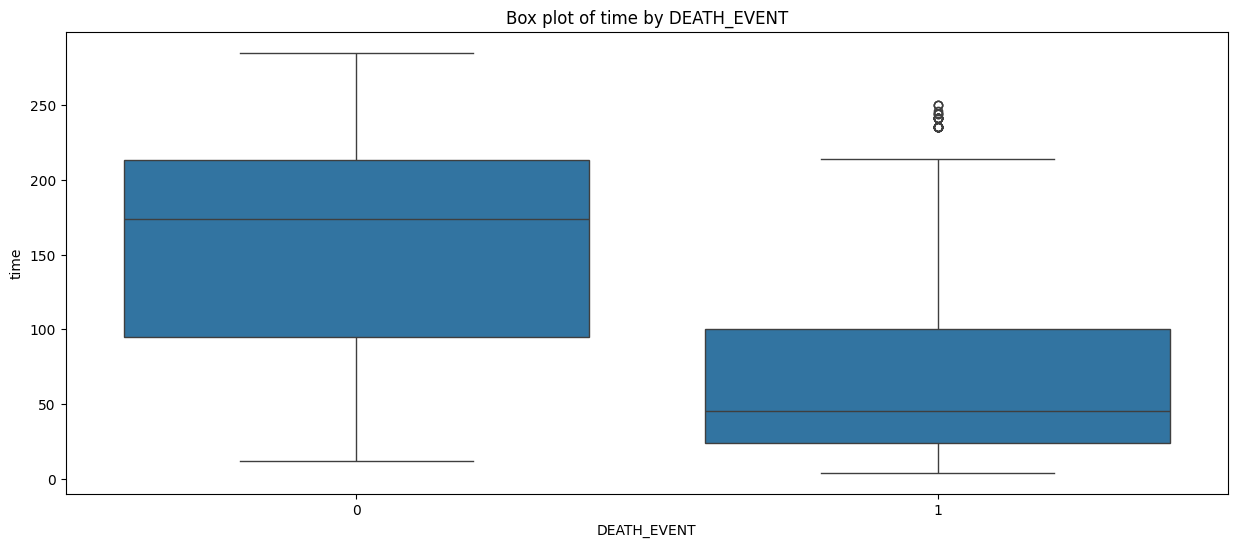

In [32]:
for feature in continuous_features:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=target, y=feature, data=df)
    plt.title(f'Box plot of {feature} by {target}')
    plt.show()

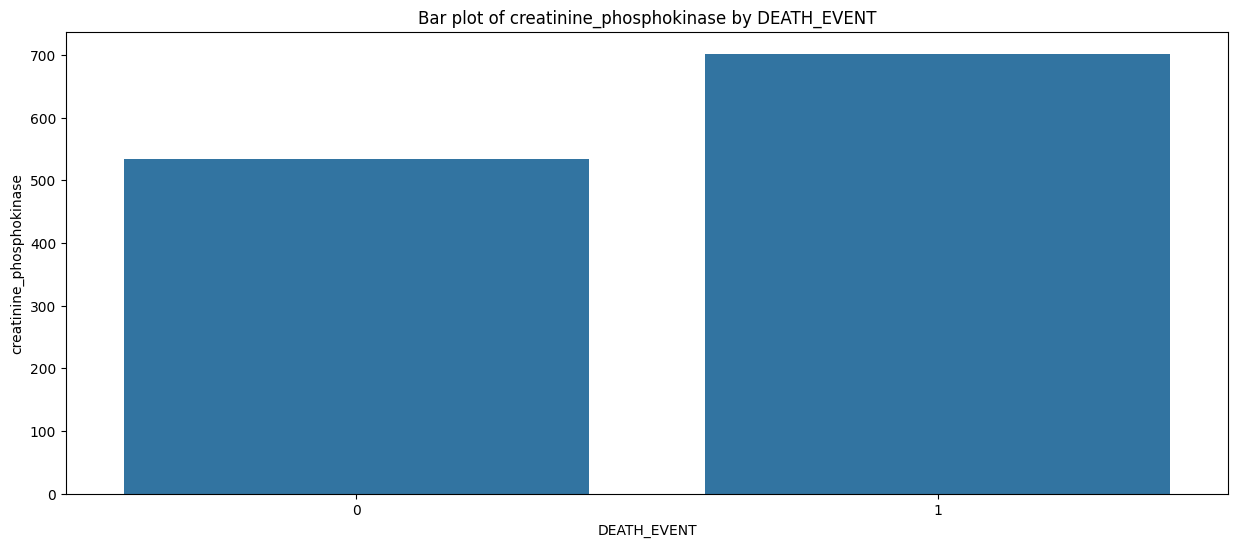

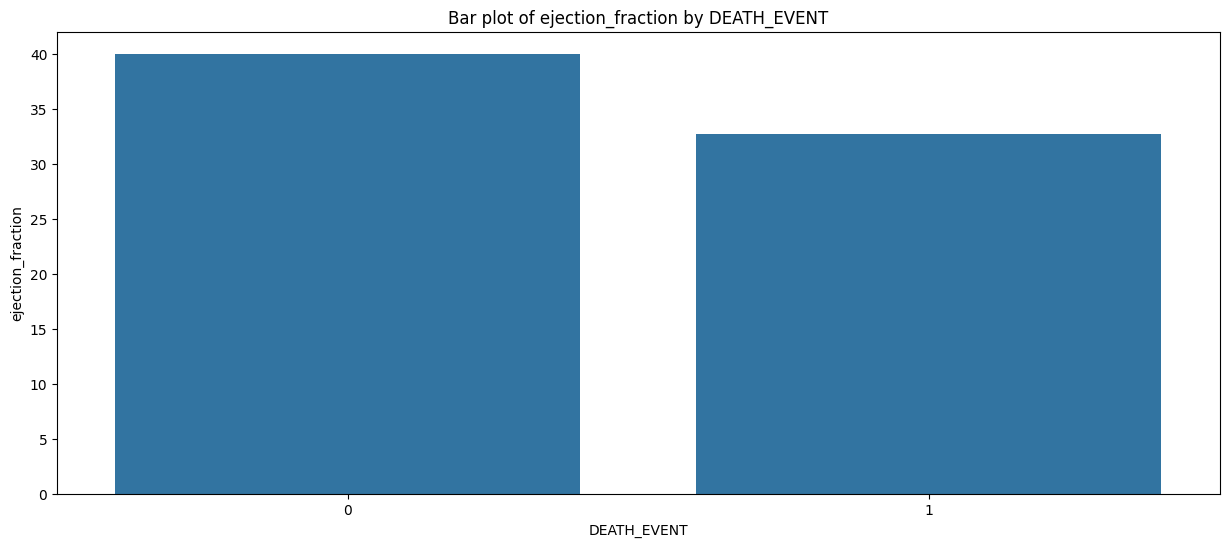

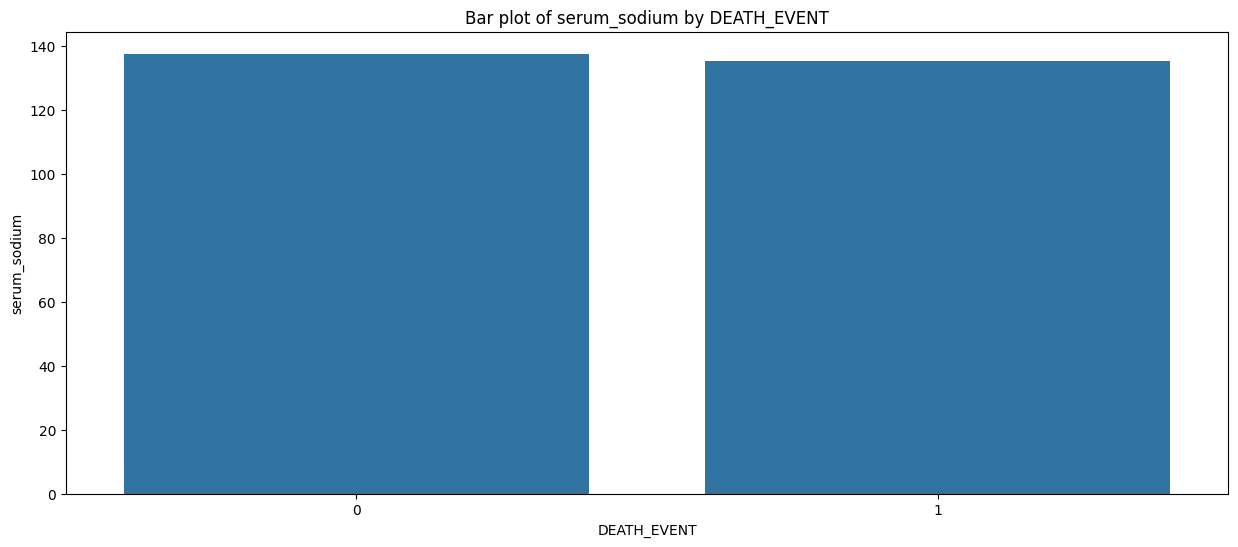

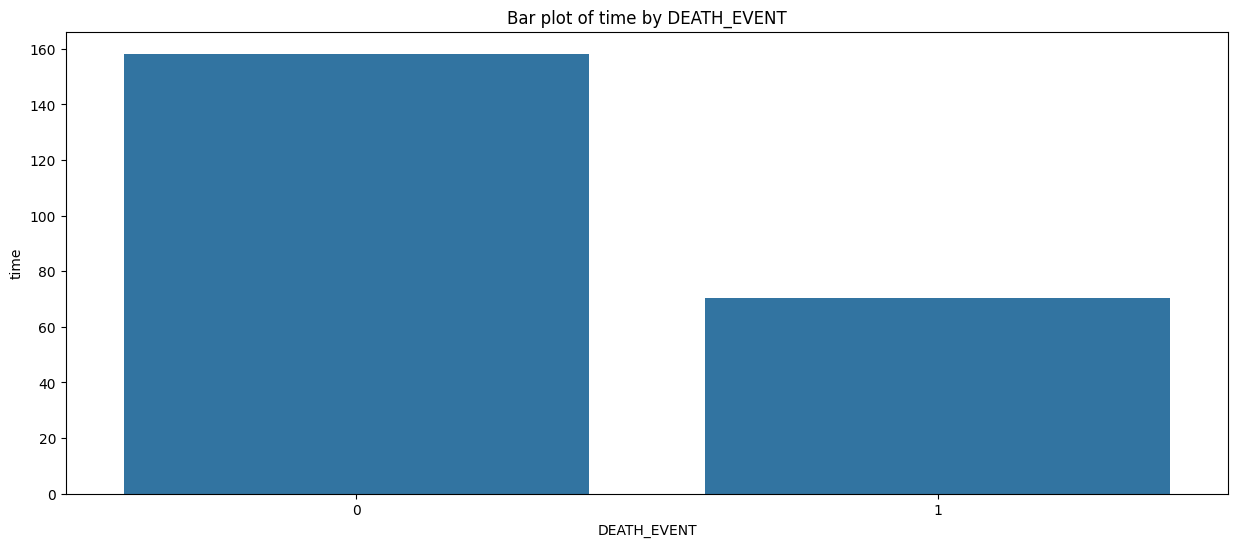

In [33]:
for feature in continuous_features:
    plt.figure(figsize=(15, 6))
    sns.barplot(x=target, y=feature, ci = None, data=df)
    plt.title(f'Bar plot of {feature} by {target}')
    plt.show()

# Bivariate Analysis

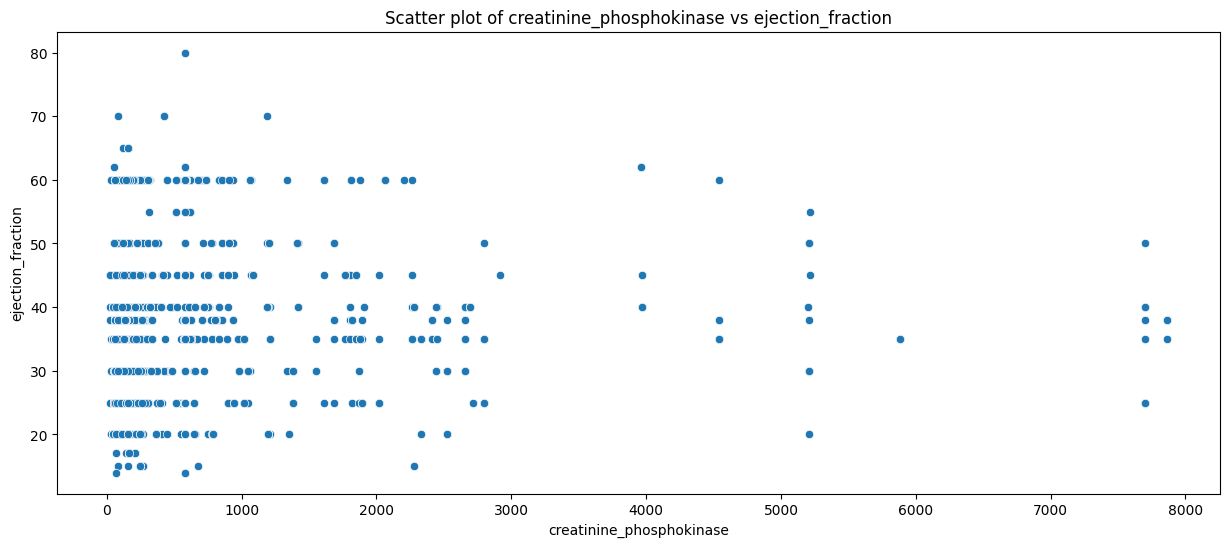

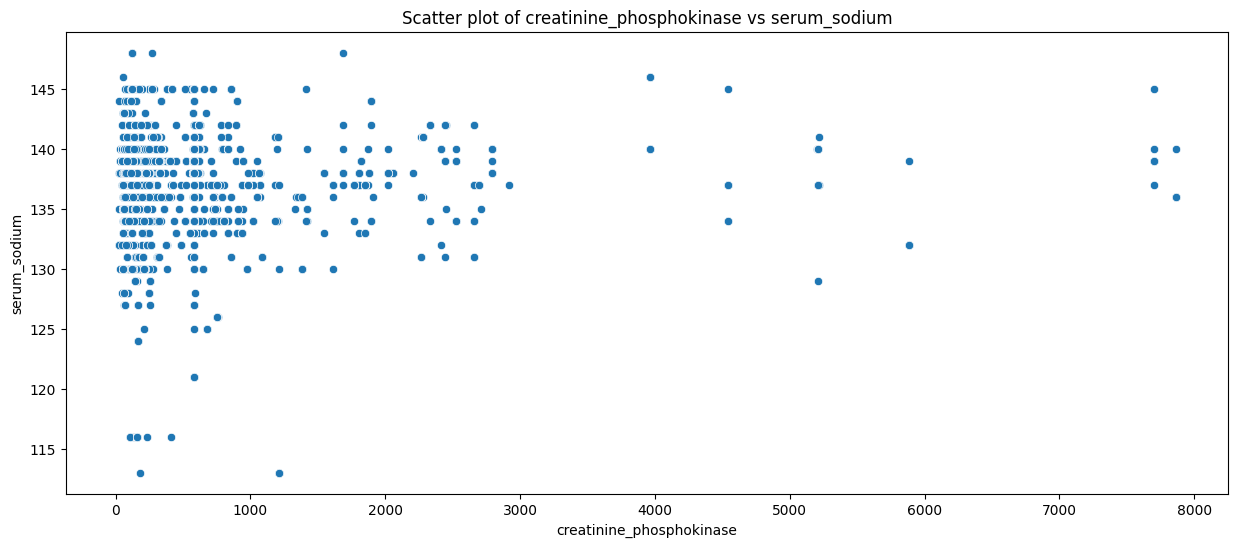

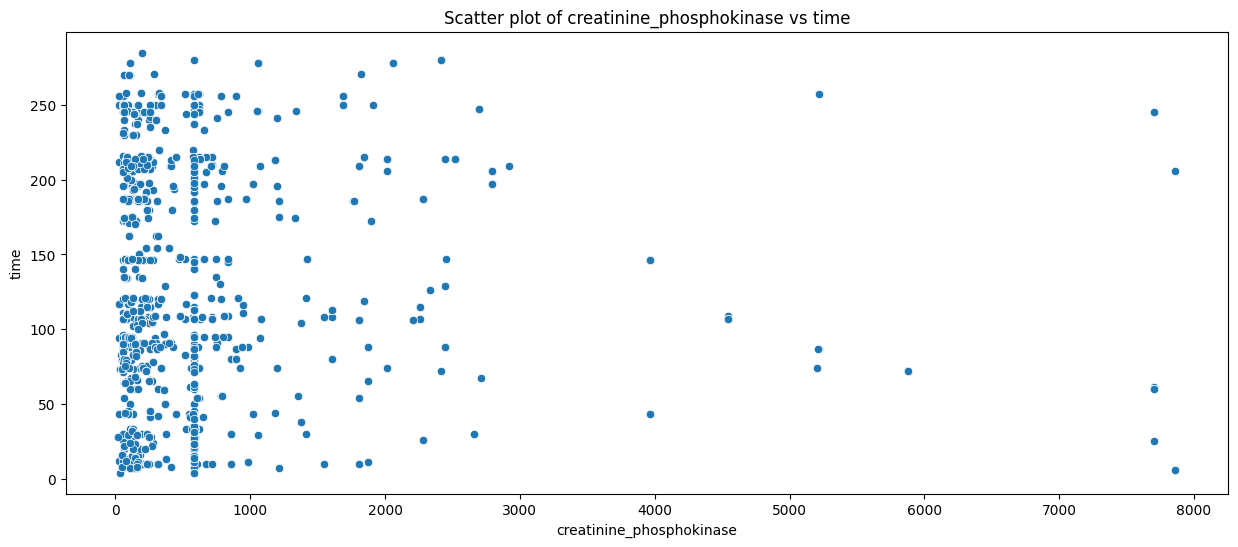

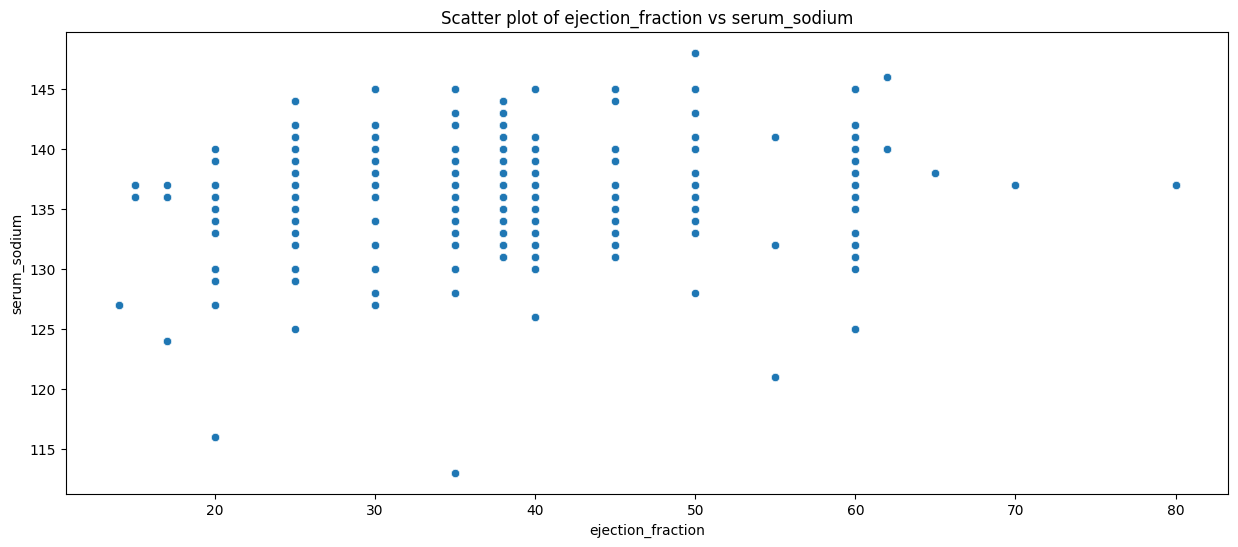

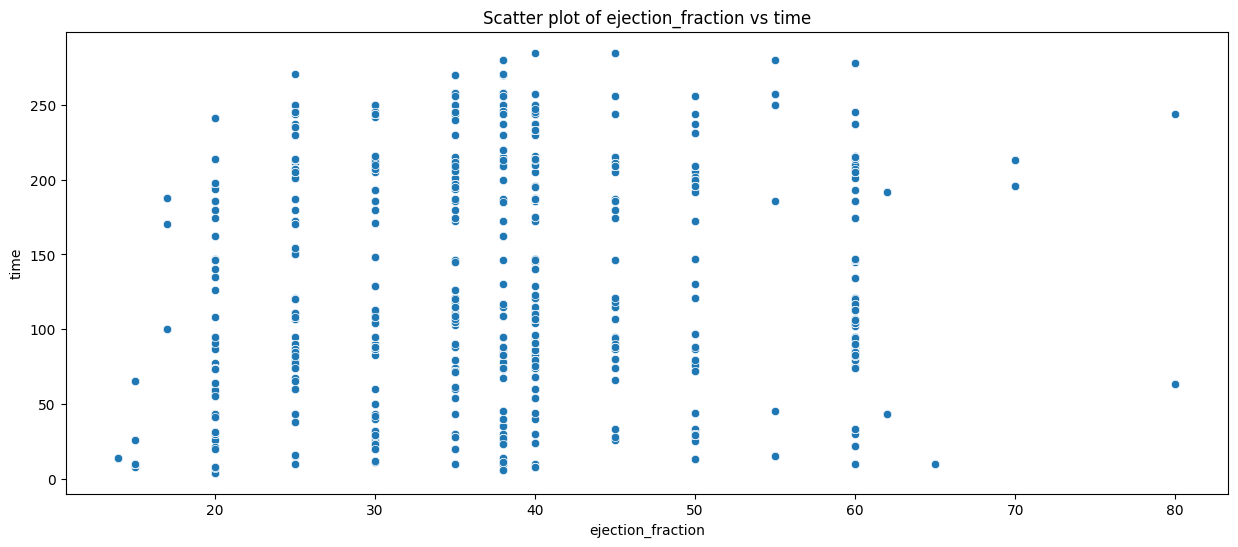

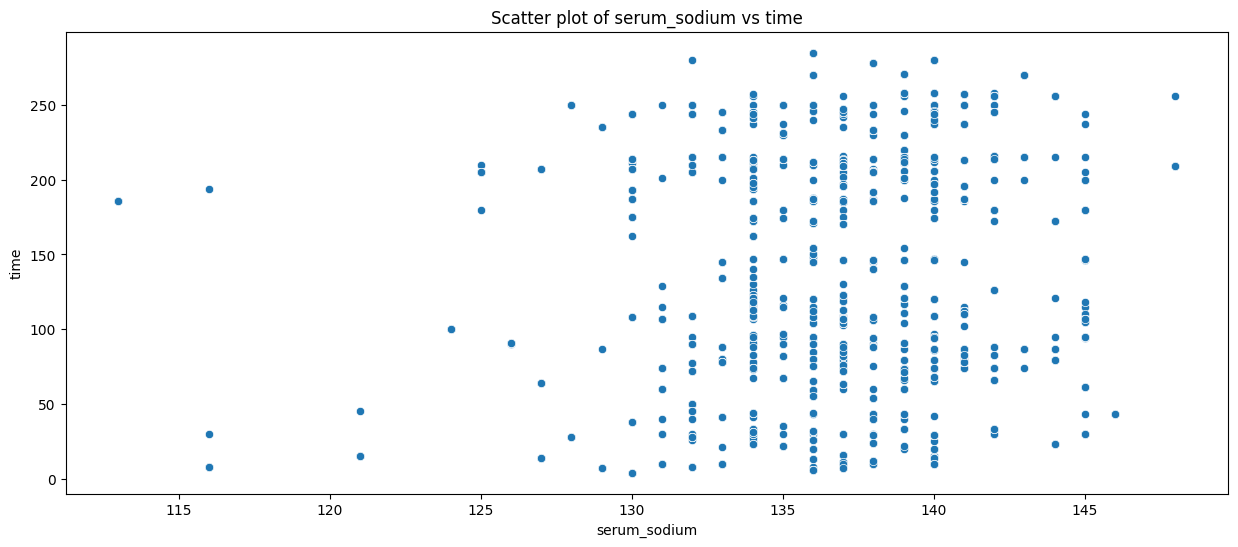

In [34]:
for i in range(len(continuous_features)):
    for j in range(i + 1, len(continuous_features)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous_features[i], y=continuous_features[j], data=df, palette='hls')
        plt.title(f'Scatter plot of {continuous_features[i]} vs {continuous_features[j]}')
        plt.show()

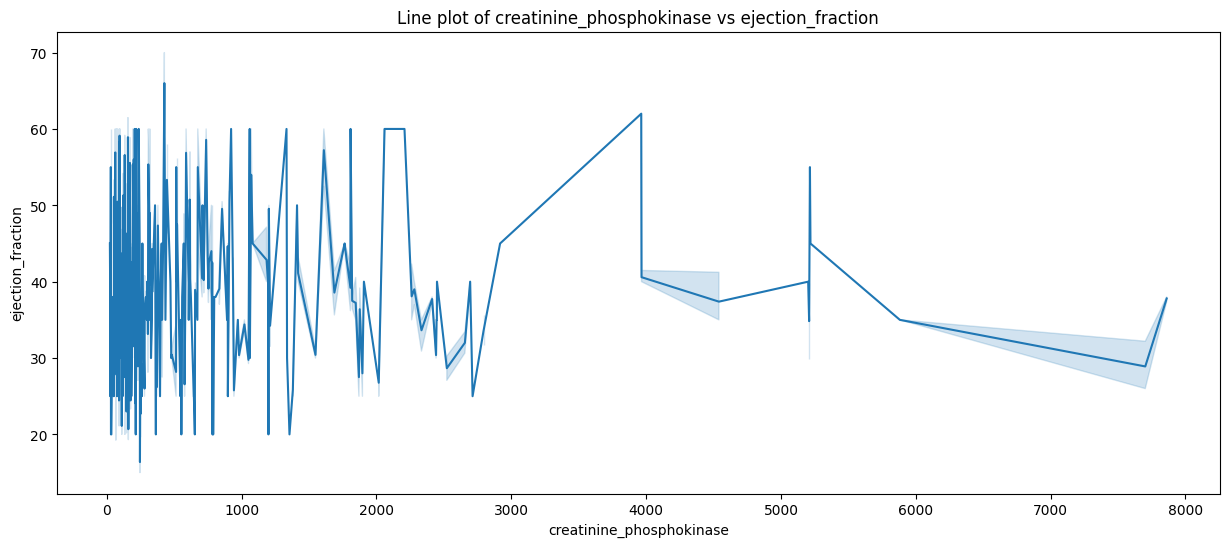

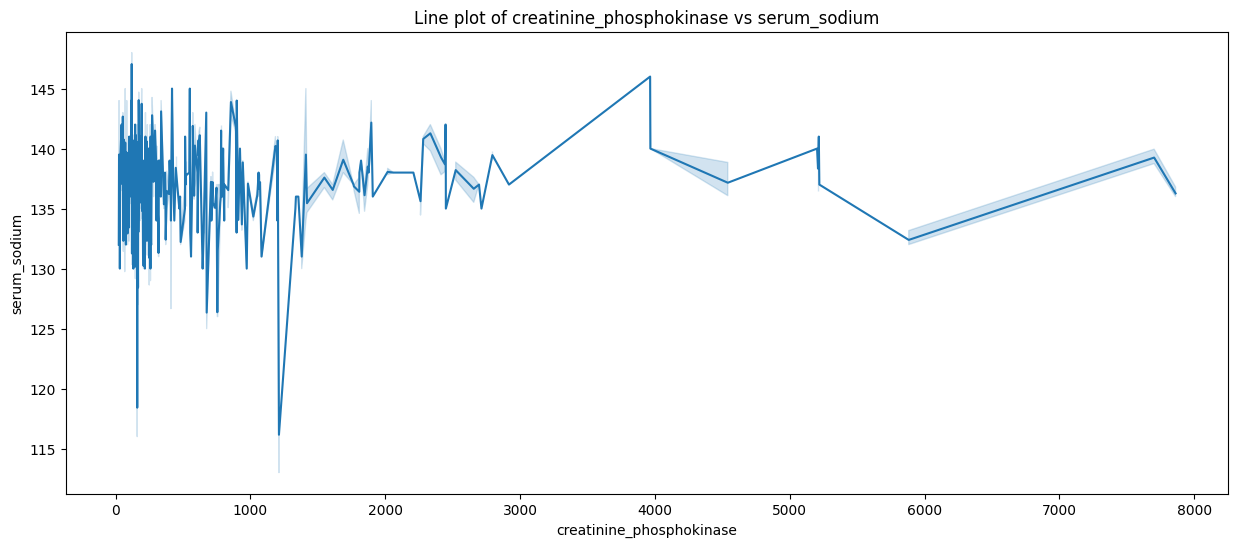

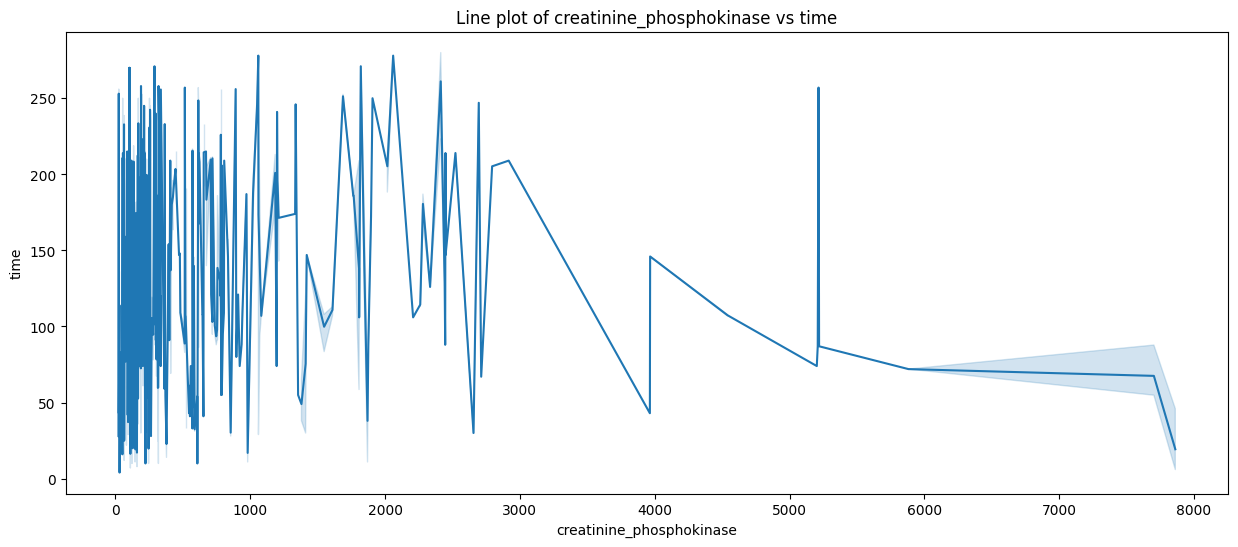

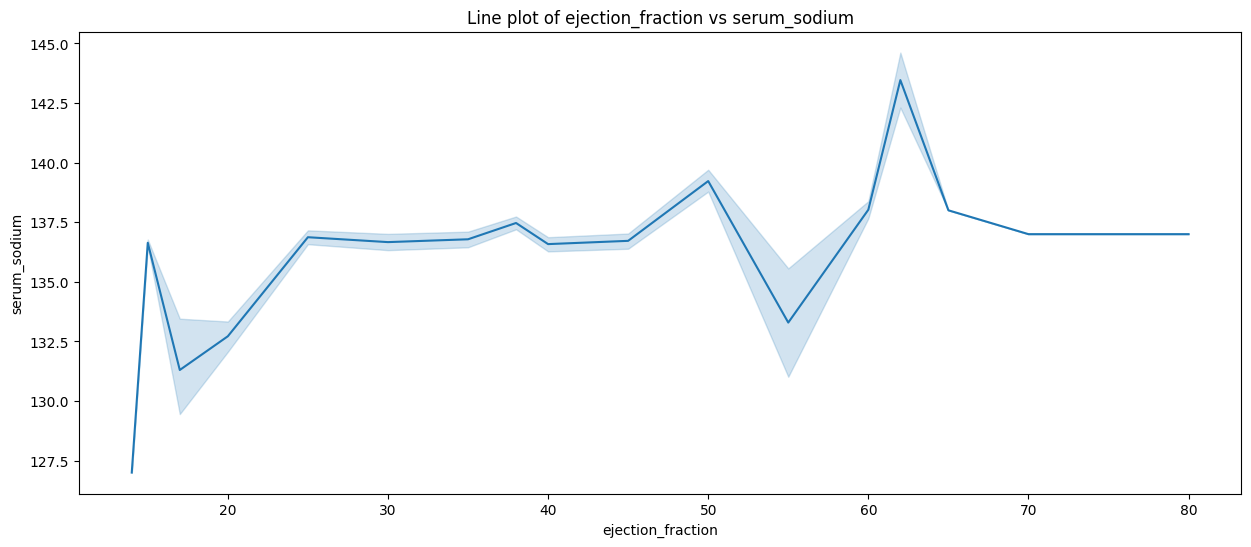

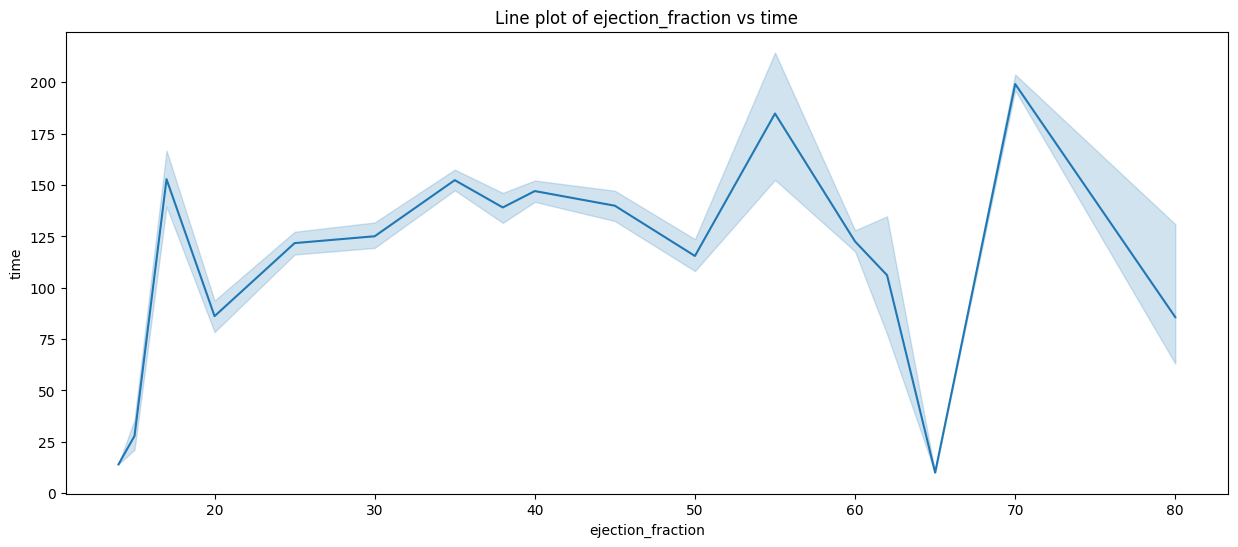

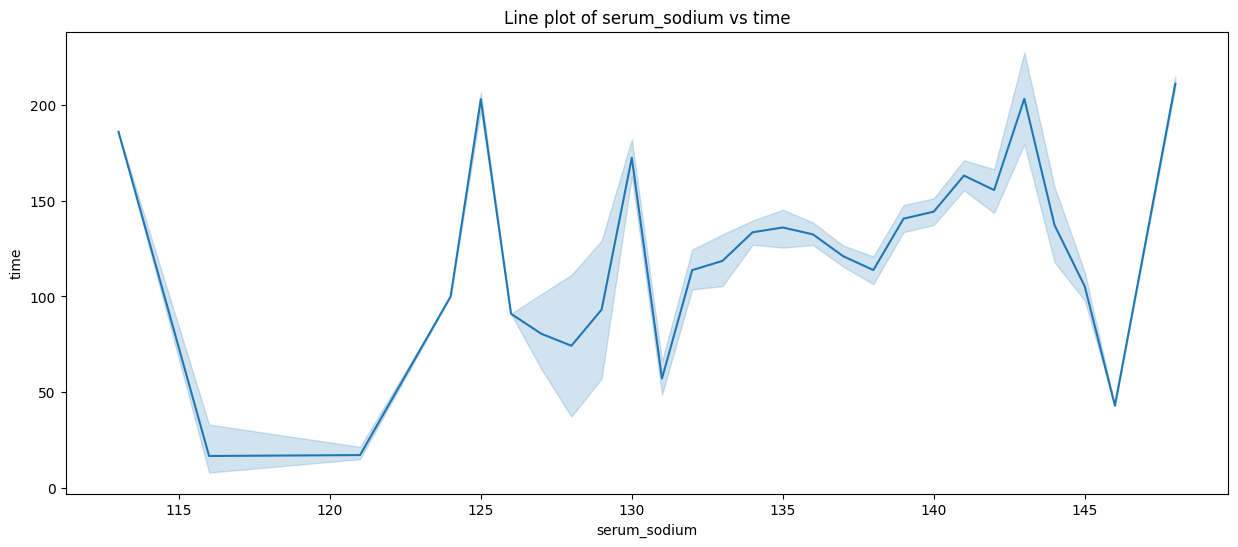

In [35]:
for i in range(len(continuous_features)):
    for j in range(i + 1, len(continuous_features)):
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=continuous_features[i], y=continuous_features[j], data=df, palette='hls')
        plt.title(f'Line plot of {continuous_features[i]} vs {continuous_features[j]}')
        plt.show()


In [36]:
correlation_with_target = df.corr()[target]
correlation_with_target


age                         0.249442
anaemia                     0.054508
creatinine_phosphokinase    0.079706
diabetes                   -0.011273
ejection_fraction          -0.292702
high_blood_pressure         0.094023
platelets                  -0.031521
serum_creatinine            0.311281
serum_sodium               -0.227355
sex                         0.055604
smoking                     0.009397
time                       -0.527234
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [37]:
pivot_table = pd.pivot_table(df, index='anaemia', columns='smoking', values='age', aggfunc='median')
pivot_table

smoking,0,1
anaemia,,
0,58.0,60.0
1,60.0,60.0


In [38]:
pivot_table = pd.pivot_table(df, index='DEATH_EVENT', columns='smoking', values='age', aggfunc='mean')
pivot_table
#for values we use continuous features,index use descrete features

smoking,0,1
DEATH_EVENT,,
0,58.424259,58.076101
1,63.829441,66.266533


In [39]:
pivot_table = pd.pivot_table(df, index='DEATH_EVENT', columns='diabetes', values='age', aggfunc='mean')
pivot_table

diabetes,0,1
DEATH_EVENT,,
0,58.958137,57.510855
1,66.391256,62.248036


In [40]:
pivot_table = pd.pivot_table(df, index='DEATH_EVENT', columns=['diabetes','smoking'], values='age', aggfunc='mean')
pivot_table

diabetes             0                     1           
smoking              0          1          0          1
DEATH_EVENT                                            
0            59.790558  57.658177  57.105504  59.069003
1            65.038462  68.809375  62.437972  61.720670

# Data Modelling

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [42]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [45]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

# Model Evaluation

In [46]:
log_reg_pred = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.796


In [47]:
y_pred_train = log_reg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.78225


# SVM

In [48]:
svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)

SVC()

In [49]:
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.632


In [50]:
y_pred_train = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.6135


In [51]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear')

In [52]:
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.743


In [53]:
y_pred_train = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.73525
